In [1]:
# Importando as bibliotecas
import pandas as pd
from pyxlsb import open_workbook as open_xlsb
import pandas_profiling
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np


In [129]:
# Função 1

def showBarCountPlots(columns,data):
    """
    Função que plota graficos de barras usando agregação de contagem
    Argumentos:
       columns: Colunas catégorias de um data frame
          data: Data Frame
    
    """
    
    for index, col in enumerate(columns):
        plt.figure(index, figsize=(24,8))
        sb.countplot(x=data[col], data=data[columns])
        
# Função 2     

def corr_rap(idx,num_columns,data):
    """
    
    Função que corrige as observações responsáveis por criar colunas extras
    Argumentos:
           idx: lista de indexs com problema
     num_colum: numero de colunas que foram acresentadas
          data: Data Frame

    """
    
    for i in data.iloc[idx,22:22 + num_columns].index:
        for j in data.iloc[idx,22:22 + num_columns]:
            data.loc[i,'regra_alcance_parcial'] += ' ' + str(data.loc[i,j])
    data.iloc[idx,22:33] = data.iloc[idx,22+ num_column :33 + num_column].values.tolist()       


In [3]:
# Importanto o data set
# Fonte: https://stackoverflow.com/questions/45019778/read-xlsb-file-in-pandas-python
df = []
with open_xlsb('ambev-final-dataset.xlsb') as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df = pd.DataFrame(df[1:], columns=df[0])

In [4]:
# configurando para aparecer as todas as colunas
pd.set_option('display.max_columns', 38)

In [5]:
# Visualisando o Data Frame
df.head()

,Mês Referência,País,Mundo,Regional/Área,Unidade,Grupo Cargo,Cargo,Grade,Banda,Área,Nome FuncionÁ¡rio,Nome Gestor,Código KPI,Diretoria,Áreas da Diretoria,Função,Tipo da Meta,Categoria KPI,Nome KPI,Peso KPI,Prazo,Regra Alcance Parcial,Meta Projeto,% Ating Mês,% Pontos Mês,% Acum Mês,% Ating Acumulado,% Pontos Acumulado,% Acum Acumulado,% Ating Fim Exer,% Pontos Fim Exer,% Acum Fim Exer,Status Meta,None,None,None,None,None
0,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,2774.0,237.0,001VA0561,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4729.0,25.0,12/31/2017 12:00:00 AM,"PA1: 99,5% da meta PA2: 99,0% da meta",Não,0,0,0,0,0,0.0,100.0,100.0,25.0,Monitoramento Aprovado,None,NaN,NaN,NaN,None
1,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,2774.0,237.0,001VA0609,Diretoria de Vendas e Distribuição,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,3138.0,20.0,12/31/2017 12:00:00 AM,80% pontos: -10pp vs Bgt,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None
2,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,2774.0,237.0,001TM0051,Diretoria de Vendas e Distribuição,Trade Marketing,GER DE VENDAS,Mandatório,Market Share/ Volume,3103.0,20.0,12/31/2017 12:00:00 AM,PA1: 80% = 80% pts PA2: 60% = 60% pts,Não,80,60,12,80,60,12.0,100.0,100.0,20.0,Monitoramento Aprovado,None,NaN,NaN,NaN,None
3,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,2774.0,237.0,001VC0272,Diretoria de Vendas e Distribuição,Campo,GER DE VENDAS,Mandatório,Market Share/ Volume,4757.0,15.0,12/31/2017 12:00:00 AM,PA1: 95%_x000D_ PA2: 90%,Não,100,100,15,90,80,12.0,100.0,100.0,15.0,Monitoramento Aprovado,None,NaN,NaN,NaN,None
4,32017.0,Brasil,Sales,10.0,78.0,GER DE VENDAS REVENDA,GERENTE DE VENDAS REVENDA II,12.0,VI-B,GERÊNCIA CD,2774.0,237.0,001RF0335,Diretoria de Refrigenanc,AC,GER DE VENDAS,Mandatório,Market Share/ Volume,4762.0,20.0,12/31/2017 12:00:00 AM,"80% pontos: 97,5% da meta",None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270633 entries, 0 to 270632
Data columns (total 38 columns):
Mês Referência           270633 non-null float64
País                     270633 non-null object
Mundo                    270501 non-null object
Regional/Área           270633 non-null float64
Unidade                  270633 non-null float64
Grupo Cargo              230099 non-null object
Cargo                    262118 non-null object
Grade                    262118 non-null float64
Banda                    262118 non-null object
Área                    262116 non-null object
Nome FuncionÁ¡rio        270633 non-null float64
Nome Gestor              270633 non-null float64
Código KPI               230229 non-null object
Diretoria                230229 non-null object
Áreas da Diretoria      230229 non-null object
Função                   230229 non-null object
Tipo da Meta             270633 non-null object
Categoria KPI            267176 non-null object
Nome KPI           

# Documentar os dados acima

# Problemas De Qualidade

- 'Mês Referência', está com as datas com formato M/A sem o "/"
- 'País', panamá estar escrito errado
- 'Mundo', Varias observações que podem ser agrupadas, nome errados, escritos em outro idioma, valores faltantes
- 'Grupo Cargo', Varias observações que podem ser agrupadas, nome errados valores faltantes
- 'Cargo', Varias observações que podem ser agrupadas, nome errados, valores faltantes.
- 'Área', nomes escritos errados, alguns com nome de Estados, valores faltantes
- 'Código KPI', muitos valores faltantes, vários valores que so tem apenas uma ocorrencia
- 'Diretoria', muitos valores faltantes  "Diretoria de Refrigenanc" e "Diretoria de RelaçÁµes Corporativas" estão erradas
- 'Função', muitos valores faltates, nomes escritos errados
- 'Tipo da Meta', obervação 'Grupo Área' com formatação indevida
- 'Categoria KPI', sem padronização, vários idimoas, nomes errados
- 'Peso KPI', números fora da normatização
- 'Prazo', tem alguma coluna para relacionar?
- 'Regra Alcance Parcial'?
- 'Meta Projeto', muitos valores faltantes, valores faltantes + sim e não correspondem a 90% das observações, o resto pode ser descartado
- '% Ating Mês', muito valores faltantes, observação 'não' é equivalente a '0.0', 'training' deve ser descartado, 'achievement deve ser descartado
- '% Pontos Mês',muito valores faltates, 'action splans) is achieved.', 'action splans) is achieved', '80% of points_x000D_ PA2: >=95% goal' devem ser descartados, número insiginificante de observações
- '% Acum Mês', muito valores faltantes, remover os 2 outliers 'achievement'
- '% Ating Acumulado',muito valores faltantes remover outlier '60% of points"'
- '% Ating Fim Exer', muito valores faltantes
- '% Pontos Fim Exer',muito valores faltantes
- '% Acum Fim Exer',muito valores faltantes
- 'Status Meta', alterar as osbservações 'Monitoramento Aprovado' por '100.0'
- Unir abaixo?
- 'Unidade', está como float, trocar para int
- 'Nome FuncionÁ¡rio', Trocar para int
- 'Nome Gestor', Trocar para int
- 'Peso KPI', Trocar para int
- 3190 duplicates

# Problemas Estruturais

- Tratar linhas com problemas relacionadas com as columnas sem nome
- 'Banda', está em codigo, descartável
- 'Áreas da Diretoria', descartável
- 'Nome KPI' descartável
- 'None', descartáveis

# Limpeza

In [62]:
# Boa prática de fazer uma copia do data set original entes de realizar a limpeza 
# para não correr o risco de modificar os dados originais
df_clean = df.copy()
# Caso tenha dados faltantes, vamos padronizar-los preenchendo com valores "nan"
df_clean.fillna(value=np.nan, inplace=True)
# Renomeando as colunas
nome_colunas = [
   'mes', 'pais', 'mundo', 'area_regional', 'unidade',
   'grupo_cargo', 'cargo', 'grade', 'banda', 'area', 'id_funcionario',
   'id_gestor', 'id_kpi', 'diretoria', 'area_diretoria',
   'funcao', 'tipo_meta', 'categoria_kpi', 'nome_kpi', 'peso_kpi',
   'prazo', 'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes',
   'pct_pts_mes', 'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
   'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
   'pct_acum_fim_exer', 'status_meta', 'c33', 'c34', 'c35', 'c36', 'c37']
df_clean.columns = nome_colunas

## Estrutura

- Tratar linhas com problemas relacionadas com as columnas sem nome


### Código
Primeiro temos que encontrar quais padrões  e quais linhas esses padrões existem

In [63]:
idx_prob = df_clean[['c33','c34','c35','c36','c37']].dropna(how = 'all').index
df_clean.loc[idx_prob][['c33','c34','c35','c36','c37']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 9610 to 266112
Data columns (total 5 columns):
c33    29 non-null object
c34    28 non-null float64
c35    2 non-null float64
c36    2 non-null float64
c37    2 non-null object
dtypes: float64(3), object(2)
memory usage: 1.4+ KB


Aparentemente temos 29 linhas com probelmas, elas seguem o padrao de elas se dividem indo do c33 ao c28, em resumo temos 3 padrões:

- Padrao 1: divisão de 'regra_alcance_parcial' em mais uma coluna.
- Padrão 2: divisão de 'regra_alcance_parcial' em mais duas colunas.
- Padrão 3: divisão de 'regra_alcance_parcial' em mais cinco colunas.

Esses padrões desolocam a divisão do conteudo 'regra_alcance_parcial' para direita, preenchendo as colunas vizinhas, ee com isso foi criado essas colunas sem nomes

## Tratanto padrão 1

Divisão de 'regra_alcance_parcial' em mais uma coluna.

## Código
Encontrar o index das linhas e depois aplicar a função corr_rap documentada acima

In [64]:
# Encontrando as linhas
idx = df_clean[df_clean[['c33','c34','c35','c36','c37']].isnull().sum(axis = 1) == 4].index
num_column = 1
# Aplicando a função
corr_rap(idx,num_column,df_clean)

## Teste

In [65]:
df_clean['regra_alcance_parcial'].loc[idx]

80305    PA1: ABI MKT SHARE BGT OK = 80% of points_x000...
Name: regra_alcance_parcial, dtype: object

In [66]:
df_clean.loc[idx]

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,id_funcionario,id_gestor,id_kpi,diretoria,area_diretoria,funcao,tipo_meta,categoria_kpi,nome_kpi,peso_kpi,prazo,regra_alcance_parcial,meta_projeto,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,c33,c34,c35,c36,c37
80305,62017.0,Brasil,CE,1.0,275.0,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,3235.0,1510.0,001MK0464,Diretoria de Marketing,AC,GER MKT,Mandatório,Market Share/ Volume,591.0,20.0,43100,PA1: ABI MKT SHARE BGT OK = 80% of points_x000...,Não,100,100,20,100,100,20.0,100.0,100.0,20.0,Monitoramento Aprovado,Monitoramento Aprovado,NaN,NaN,NaN,NaN


## Tratando padrão 2
## Código
Divisão de 'regra_alcance_parcial' em mais duas colunas.

In [67]:
# Encontrando as linhas
idx = df_clean[df_clean[['c33','c34','c35','c36','c37']].isnull().sum(axis = 1) ==3].index
num_column = 3
# Aplicando a função
corr_rap(idx,num_column,df_clean)

## Teste

In [68]:
df_clean['regra_alcance_parcial'].loc[idx]

231383    Each detailed action will be considered achiev...
231385    Each detailed action will be considered achiev...
231387    Each detailed action will be considered achiev...
231415    Each detailed action will be considered achiev...
237217    Each detailed action will be considered achiev...
237219    Each detailed action will be considered achiev...
237221    Each detailed action will be considered achiev...
242836    Each detailed action will be considered achiev...
242838    Each detailed action will be considered achiev...
242840    Each detailed action will be considered achiev...
248765    Each detailed action will be considered achiev...
248767    Each detailed action will be considered achiev...
248769    Each detailed action will be considered achiev...
248797    Each detailed action will be considered achiev...
254472    Each detailed action will be considered achiev...
254474    Each detailed action will be considered achiev...
254476    Each detailed action will be c

In [69]:
df_clean.loc[idx]

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,id_funcionario,id_gestor,id_kpi,diretoria,area_diretoria,funcao,tipo_meta,categoria_kpi,nome_kpi,peso_kpi,prazo,regra_alcance_parcial,meta_projeto,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,c33,c34,c35,c36,c37
231383,62017.0,PanamÁ¡,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria Contínua,2169.0,40.0,30.12.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,40.0,NaN,100.0,40.0,NaN,100,40.0,NaN,NaN,NaN
231385,62017.0,PanamÁ¡,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 2,Mejoria Contínua,3309.0,30.0,30.12.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,30.0,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN
231387,62017.0,PanamÁ¡,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 3,Mejoria Contínua,352.0,30.0,30.12.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,30.0,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN
231415,62017.0,PanamÁ¡,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,6707.0,148.0,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria Contínua,2518.0,30.0,30.12.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN
237217,72017.0,Panama,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria ContÃ­nua,2169.0,40.0,30.06.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,40.0,NaN,100.0,40.0,NaN,100,40.0,NaN,NaN,NaN
237219,72017.0,Panama,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 2,Mejoria ContÃ­nua,3309.0,30.0,30.06.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,30.0,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN
237221,72017.0,Panama,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 3,Mejoria ContÃ­nua,352.0,30.0,30.06.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN
242836,82017.0,Panama,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 1,Mejoria ContÃ­nua,2169.0,40.0,30.06.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,40.0,NaN,100.0,40.0,NaN,100,40.0,NaN,NaN,NaN
242838,82017.0,Panama,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 2,Mejoria ContÃ­nua,3309.0,30.0,30.06.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,30.0,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN
242840,82017.0,Panama,Finance,4.0,258.0,NaN,NaN,NaN,NaN,NaN,1901.0,1727.0,NaN,NaN,NaN,NaN,Metas Individuales 3,Mejoria ContÃ­nua,352.0,30.0,30.06.2017,Each detailed action will be considered achiev...,NaN,NaN,NaN,NaN,NaN,100,30.0,NaN,100.0,30.0,NaN,100,30.0,NaN,NaN,NaN


## Tratando padrão 3
Divisão de 'regra_alcance_parcial' em mais cinco colunas.

In [70]:
# Encontrando as linhas
idx = df_clean[df_clean[['c33','c34','c35','c36','c37']].isnull().sum(axis = 1) ==0].index
num_column = 5
# Aplicando a função
corr_rap(idx,num_column,df_clean)

## Teste

In [71]:
df_clean['regra_alcance_parcial'].loc[idx]

9610     PA1: >=97 5% goal  achievement  80% of points_...
31343    PA1: >=97 5% goal  achievement  80% of points_...
Name: regra_alcance_parcial, dtype: object

In [72]:
df_clean.loc[idx]

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,id_funcionario,id_gestor,id_kpi,diretoria,area_diretoria,funcao,tipo_meta,categoria_kpi,nome_kpi,peso_kpi,prazo,regra_alcance_parcial,meta_projeto,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,c33,c34,c35,c36,c37
9610,32017.0,Brasil,CE,1.0,275.0,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,954.0,588.0,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.0,20.0,12/31/2017 12:00:00 AM,PA1: >=97 5% goal achievement 80% of points_...,Não,100,100,20,100,100,20.0,100.0,100.0,20.0,Monitoramento Aprovado,20,100.0,100.0,20.0,Monitoramento Aprovado
31343,42017.0,Brasil,CE,1.0,275.0,ESPECIALISTA,ESPECIALISTA IV,15.0,V-A,MARKETING,954.0,588.0,001MK0404,Diretoria de Marketing,AC,GER MKT,Mandatório,Projetos/ Iniciativas de Longo Prazo/ Estratégia,1914.0,20.0,12/31/2017 12:00:00 AM,PA1: >=97 5% goal achievement 80% of points_...,Não,100,100,20,100,100,20.0,100.0,100.0,20.0,Monitoramento Aprovado,20,100.0,100.0,20.0,Monitoramento Aprovado


## Deletando as colunas extras

In [73]:
colunas_prob =['c33','c34','c35','c36','c37']
df_clean.drop(colunas_prob,axis = 1, inplace = True)

## Teste

In [74]:
df_clean.columns

Index(['mes', 'pais', 'mundo', 'area_regional', 'unidade', 'grupo_cargo',
       'cargo', 'grade', 'banda', 'area', 'id_funcionario', 'id_gestor',
       'id_kpi', 'diretoria', 'area_diretoria', 'funcao', 'tipo_meta',
       'categoria_kpi', 'nome_kpi', 'peso_kpi', 'prazo',
       'regra_alcance_parcial', 'meta_projeto', 'pct_ating_mes', 'pct_pts_mes',
       'pct_acum_mes', 'pct_ating_acum', 'pct_pts_acumulado',
       'pct_acum_acumulado', 'pct_ating_fim_exer', 'pct_pts_fim_exer',
       'pct_acum_fim_exer', 'status_meta'],
      dtype='object')

# REMCOMEÇAR

In [75]:
df_clean[['pct_ating_mes','pct_pts_mes','pct_acum_mes','pct_ating_acum','pct_pts_acumulado']] = df_clean[['pct_ating_mes','pct_pts_mes','pct_acum_mes','pct_ating_acum','pct_pts_acumulado']].astype('float64')

In [76]:
df_clean.dtypes

mes                      float64
pais                      object
mundo                     object
area_regional            float64
unidade                  float64
grupo_cargo               object
cargo                     object
grade                    float64
banda                     object
area                      object
id_funcionario           float64
id_gestor                float64
id_kpi                    object
diretoria                 object
area_diretoria            object
funcao                    object
tipo_meta                 object
categoria_kpi             object
nome_kpi                 float64
peso_kpi                 float64
prazo                     object
regra_alcance_parcial     object
meta_projeto              object
pct_ating_mes            float64
pct_pts_mes              float64
pct_acum_mes             float64
pct_ating_acum           float64
pct_pts_acumulado        float64
pct_acum_acumulado       float64
pct_ating_fim_exer       float64
pct_pts_fi

# Qualidade

## 'Mês Referência', está com as datas com formato M/A sem o "/"
- Dividir o mês e o ano em colunas indenpendes e depois converter a coluna 'Mês Referência' com os nomes dos messes
### Código

In [77]:
# extrair 2 grupos, do mês e do ano e amazernar nas respectivas colunas
# é nessário converter para "str" para usar o método "extract"
df_clean[['mes','ano']] = df_clean['mes'].astype('str').str.extract(r'(\d{1,2})(\d{4})\.\d$')

In [78]:
# criando um mapa para substituir com os nomes dos messes
# é nessário converter novamente para "int", para usar o método "map"
map_mes={1:'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 
         7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}
df_clean['mes'] = df_clean['mes'].astype('int').map(map_mes)

### Teste

In [79]:
df_clean['mes'].value_counts()

Dezembro    30713
Novembro    30504
Outubro     29226
Agosto      28620
Junho       28361
Setembro    28271
Julho       27625
Abril       23456
Maio        22913
Março       20944
Name: mes, dtype: int64

## 'País', panamá estar escrito errado
- Apenas trocar as conrrespondências "Panama" e "PanamÁ¡" por "Panamá"

In [80]:
# Filtrando e susbstituindo todas as linhas da columna "País" que tem os valores "Pamana" ou "PanamÁ¡" por "Panamá"
df_clean.loc[df_clean.query('pais == "Panama" | pais == "PanamÁ¡"').index,"pais"] = "Panamá"

## Teste

In [81]:
df_clean.query('pais == "Panama" | pais == "PanamÁ¡"')

,mes,pais,mundo,area_regional,unidade,grupo_cargo,cargo,grade,banda,area,id_funcionario,id_gestor,id_kpi,diretoria,area_diretoria,funcao,tipo_meta,categoria_kpi,nome_kpi,peso_kpi,prazo,regra_alcance_parcial,meta_projeto,pct_ating_mes,pct_pts_mes,pct_acum_mes,pct_ating_acum,pct_pts_acumulado,pct_acum_acumulado,pct_ating_fim_exer,pct_pts_fim_exer,pct_acum_fim_exer,status_meta,ano


In [82]:
df_clean['pais'].value_counts(dropna = False)

Brasil             230229
Rep. Dominicana     24120
Panamá               8279
Barbados             4131
Guatemala            2799
Saint Vincent         753
Dominica              262
Cuba                   60
Name: pais, dtype: int64

## 'Mundo', Varias observações que podem ser agrupadas, nome errados, escritos em outro idioma, valores faltantes
- Dividir todas as obervações por os grupos : Suprimentos, Vendas,CE,DG e Outros 

In [83]:
# Criando os Grupos filtrando por basse booleana com palavras chaves e assim renomeando
df_clean.loc[df_clean['mundo'][df_clean['mundo'].str.contains('Supply', na=False)].index,"mundo"] = "Suprimentos"
df_clean.loc[df_clean['mundo'][df_clean['mundo'].str.contains('Sales', na = False)].index, "mundo"] =  "Vendas"
df_clean.loc[df_clean['mundo'][~df_clean['mundo']
                               .str.contains('Suprimentos|Vendas|CE|DG', na = False)].index, "mundo"] =  "Outros"

## Teste

In [84]:
df_clean['mundo'].value_counts(dropna = False)

Suprimentos    114219
Vendas          98056
CE              46274
Outros           6571
DG               5513
Name: mundo, dtype: int64

## 'Grupo Cargo', Varias observações que podem ser agrupadas, nome errados valores faltantes
- Separar 2 grupos, GERENCIAIS, OPERACIONAIS usando a coluna "Cargo Como Referência"


In [85]:
# Criando os Grupos filtrando por base booleana com palavras chaves e assim renomeando
df_clean.loc[df_clean['grupo_cargo'][df_clean['cargo'].str.contains('GER|COORD|HEAD|GREG|GCORP',na = False)].index,"grupo_cargo"] = "GERENCIAIS"
df_clean.loc[df_clean['grupo_cargo'][~df_clean['cargo'].str.contains('GER|COORD|HEAD|GREG|GCORP',na = False)].index,"grupo_cargo"] = "OPERACIONAIS"

## Teste

In [86]:
df_clean['grupo_cargo'].value_counts(dropna = False)

OPERACIONAIS    196119
GERENCIAIS       74514
Name: grupo_cargo, dtype: int64

## 'Cargo', Varias observações que podem ser agrupadas, nome errados, valores faltantes, float mudar para int
## Código

In [87]:
# Dicionário com todos os cacacteres especiais
Dict_Caracters_Esp = { 'Á':'A','ã':'A', "Á¡":"a","Á":"A","Ã! ":"C",
                       "Ã":"A",'A"':"O","Â":"","A©":'e',"A¡":"a",
                       "§A":"c","A¢":"a","Aµ":"o","Ê":"E","É":"E",
                       "ê":"e","Í":"I","í":"i",'0':'O','Ó':'O',
                       "ó":"o",'ç':'C','Ç':"C","":"","": "","":"O",
                       "£":"","_XOOOD_":" ","â¬":"","_XOOOB_":" ",
                       "\x01O":"","A\x1c ":"O","A\x1d ": "O",
                       r"[A]\":"I",r"[A-Z]\b\": "AO","SECRETARIA":"SECRETARIA",
                       "GRUPO AREA": "GRUPO AREA"}

In [88]:
# Converter todos os carecteres para maiusculo
df_clean['cargo'] = df_clean['cargo'].str.upper() 
# Substituindo os cacacteres errados
df_clean['cargo'] = df_clean['cargo'].replace(Dict_Caracters_Esp,regex=True)


## Teste

In [89]:
df_clean['cargo'].value_counts(dropna = False)

ANALISTA I                                  18658
SUPERVISOR FABRIL                           18327
SUPERVISOR PLENO FABRIL                     16044
SUPERVISOR SENIOR FABRIL                    14655
ANALISTA II                                 12398
SUPERVISOR II                               10261
ESPECIALISTA I                               9753
ESPECIALISTA II                              8907
COORDENADOR II                               8861
ANALISTA III                                 8701
NaN                                          8515
COORDENADOR I                                6618
SUPERVISOR I                                 6250
SUPERVISOR DE MARKETING I                    5558
ESPECIALISTA III                             4985
ANALISTA FABRIL                              4814
SUPERVISOR III                               4774
ANALISTA IV                                  4155
ANALISTA PLENO FABRIL                        4090
ANALISTA SENIOR FABRIL                       3708


## 'Área', nomes escritos errados, alguns com nome de Estados, valores faltantes
## Código

In [90]:
# Converter todos os carecteres para maiusculo
df_clean['area'] = df_clean['area'].str.upper() 
# Substituindo os cacacteres errados
df_clean['area'] = df_clean['area'].replace(Dict_Caracters_Esp,regex=True)

# Teste

In [91]:
df_clean['area'].value_counts(dropna = False) 

LOGISTICA               28700
PACKAGING               24771
VENDAS ROTA             24144
GENTE GESTAO            19220
MANUTENCAO              14931
FINANCEIRO              13623
PROCESSO CERVEJA        10964
CENG                     8652
NaN                      8517
DISTRIBUICAO ROTA        7353
SUPRIMENTOS              6633
QUALIDADE ASSEGURADA     6501
ADL                      5715
APR                      5335
APF                      4655
GERENCIA CD - AS         4266
CENG CAMPO               4100
DIR REGIONAL             3921
CONTROLE                 3595
GERENCIA FABRIL          3455
JURIDICO                 3451
MARKETING                3442
VENDAS BRASIL            3279
PRODUCAO                 3269
DISTRIBUICAO AS          3247
MEIO AMBIENTE            3096
PROCESSO REFRI           2755
ADC                      2655
GERENCIA CD              2555
COMERCIAL ROTA           2369
                        ...  
CDD CURITIBA               80
COLORADO MOD               80
CERVEJA   

## 'Código KPI', muitos valores faltantes, vários valores que so tem apenas uma ocorrencia
- Agrupar os valores, a diferencição está por conta de valores númericos
## Código

In [92]:
# Extraindo um padrão regex dos valores para agrupamento
df_clean['id_kpi'] =df_clean['id_kpi'].str.extract(r'\d+?([A-Z]{2})\d+?')

## Teste

In [93]:
df_clean['id_kpi'].value_counts(dropna = False)

SC     53471
NaN    40404
LO     36542
TI     27488
GG     27143
CC     25290
VA     18838
FI     11318
VC      6147
SP      5705
DG      5163
TM      4232
RF      3409
DN      1472
DB      1449
MA      1246
MK       652
JR       445
RC       219
Name: id_kpi, dtype: int64

## 'Diretoria', muitos valores faltantes  "Diretoria de Refrigenanc" e "Diretoria de RelaçÁµes Corporativas" estão erradas

## Código

In [94]:
# Converter todos os carecteres para maiusculo
df_clean['diretoria'] = df_clean['diretoria'].str.upper() 
# Substituindo os cacacteres errados
df_clean['diretoria'] = df_clean['diretoria'].replace(Dict_Caracters_Esp,regex=True)

## Teste

In [95]:
df_clean['diretoria'].value_counts(dropna = False)

DIRETORIA INDUSTRIAL                   84045
NaN                                    40404
DIRETORIA LOGISTICA                    32504
DIRETORIA DE VENDAS E DISTRIBUICAO     30689
DIRETORIA TECNOLOGIA E INFORMACAO      27488
DIRETORIA DE GENTE                     27143
DIRETORIA FINANCEIRA                   11318
DIRETORIA DE SUPRIMENTOS                5705
DIRETORIA DISRUPTIVE GROWTH             5163
DIRETORIA DE REFRIGENANC                3409
F. DO BEM RJ                            1187
DIRETORIA DE MARKETING                   652
DIRETORIA JURIDICA                       445
F. DO BEM SP                             262
DIRETORIA DE RELACAΜES CORPORATIVAS      219
Name: diretoria, dtype: int64

# 'Função', muitos valores faltates, nomes escritos errados
## Código

In [96]:
# Usando o dicionário de caracteres especiais para corrigir as erros
df_clean['funcao'] = df_clean['funcao'].str.upper()
df_clean['funcao'] = df_clean['funcao'].replace(Dict_Caracters_Esp,regex=True)

## Teste

In [97]:
df_clean['funcao'].value_counts(dropna = False)

SUPERVISOR                       67408
ANALISTA                         48279
NaN                              40404
ESPECIALISTA                     26797
GER DE VENDAS                    11400
COORD                             9447
ENGENHEIRO                        7641
ANALISTA CONTROLE                 5695
TEC ADMINISTRATIVO                3975
GER GENTE GESTAO                  3750
GER OPERACO ES DISTRIB ROTA       3526
COORD ARMAZAO M                   2672
COORD SERV COMPARTILHADOS         2560
GERENTE FINANCEIRO                2333
GER CONTAS REGIONAL               2329
GER DE TRADE MKTG ROTA            1792
COORD DISTRIB ROTA                1585
ASSEPSISTA                        1489
GER LOGISTICA                     1485
GER QUALIDADE ASSEGURADA          1470
GER PACKAGING                     1392
GER DE MERCADO                    1347
GER PLANEJ E PERFORMANCE          1314
MICROBIOLOGISTA                   1250
GER MEIO AMBIENTE                 1232
SUPERVISOR UTILIDADES FAB

## 'Tipo da Meta', obervação 'Grupo Área' com formatação indevida

In [98]:
df_clean['tipo_meta'] = df_clean['tipo_meta'].str.upper()
df_clean['tipo_meta'] = df_clean['tipo_meta'].replace(Dict_Caracters_Esp,regex=True)
df_clean['tipo_meta'] = df_clean['tipo_meta'].replace(r"METAS INDIVIDUALES","METAS INDIVIDUAIS",regex=True)

## Teste

In [99]:
df_clean['tipo_meta'].value_counts(dropna = False)

MANDATORIO             165754
GENERICO                50536
MENU                    10893
METAS INDIVIDUAIS 1      9320
METAS INDIVIDUAIS 2      9284
METAS INDIVIDUAIS 3      9209
METAS INDIVIDUAIS 4      6759
METAS INDIVIDUAIS 5      5832
GRUPO AREA               3046
Name: tipo_meta, dtype: int64

## 'Categoria KPI', sem padronização, vários idimoas, nomes errados

In [100]:
df_clean['categoria_kpi'] = df_clean['categoria_kpi'].str.upper()
df_clean['categoria_kpi'] = df_clean['categoria_kpi'].replace(Dict_Caracters_Esp,regex=True)

In [101]:
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('CONT',na = False)].index,'categoria_kpi'] = "Melhoria Continua"
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('RENT|PROF',na = False)].index,'categoria_kpi'] = "Rentabilidade/ Custos (Maco, VIC, VLC, Ebitda, Eficiência e Produtividade)"
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('PROJ|PROY',na = False)].index,'categoria_kpi'] = "PROJETOS/ INICIATIVAS DE LONGO PRAZO/ ESTRATEGIA"
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('MARKET',na = False)].index,'categoria_kpi'] = "MARKET SHARE/ VOLUME"
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('IMAG|BRAND',na = False)].index,'categoria_kpi'] = "IMAGEM DA MARCA (BRANDHEALTH)"
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('QUALI',na = False)].index,'categoria_kpi'] = "QUALIDADE"
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('OBZ',na = False)].index,'categoria_kpi'] = "OBZ"
df_clean.loc[df_clean['categoria_kpi'][df_clean['categoria_kpi'].str.contains('GENTE|PEOPLE|GEST',na = False)].index,'categoria_kpi'] = "GENTE/GESTAO"
df_clean['categoria_kpi'] = df_clean['categoria_kpi'].str.upper()
df_clean.loc[df_clean['categoria_kpi'][~df_clean['categoria_kpi'].str.contains('GENTE|PEOPLE|GEST|OBZ|QUALI|IMAG|BRAND|MARKET|PROJ|PROY|RENT|PROF|CONT',na = False)].index,'categoria_kpi'] = "OUTROS"

## Teste

In [102]:
df_clean['categoria_kpi'].value_counts()

MELHORIA CONTINUA                                                             103647
RENTABILIDADE/ CUSTOS (MACO, VIC, VLC, EBITDA, EFICIÊNCIA E PRODUTIVIDADE)     54425
MARKET SHARE/ VOLUME                                                           32519
PROJETOS/ INICIATIVAS DE LONGO PRAZO/ ESTRATEGIA                               20703
GENTE/GESTAO                                                                   17279
QUALIDADE                                                                      17030
OUTROS                                                                         15747
OBZ                                                                             8592
IMAGEM DA MARCA (BRANDHEALTH)                                                    691
Name: categoria_kpi, dtype: int64

## 'Prazo', Datas mal formatadas

In [103]:
map_datas = { '31.12.17'   : "12/31/2017",
              '31.12.2017' : "12/31/2017",
              '30.12.2017' : "12/31/2017",
              '30.06.2017' : "06/30/2017",
              '31.10.2017' : "10/31/2017",
              '30.11.2017' : "11/30/2017",
               43070.0     : "12/01/2017",
               31.0        : "12/01/2017",
              '31.07.2017' : "07/31/2017",
               42747.0     : "01/12/2017",
              '30.08.2017' : "08/30/2017",
               42346.0     : "12/08/2015",
               42228.0     : "08/12/2015",
              '30.09.2017' : "09/30/2017",
               43039.0     : "10/31/2017",
              '30.11.17'   : "11/30/2017",
               42825.0     : "03/31/2017",
               42766.0     : "01/31/2017",
               42736.0     : "01/01/2017",
               42916.0     : "06/30/2017",
               42978.0     : "08/31/2017",
               43059.0     : "11/20/2017",
               43100.0     : "12/31/2017",
               '12/31/2017 12:00:00 AM': '12/31/2017',
               '12/01/2017 12:00:00 AM7.2017': '12/01/2017',
               '12/01/20177.2017': '12/01/2017',
               'monthly basis': 'Mensal',
               'Monthly basis': 'Mensal',
               'monthly'      : 'Mensal',
               'Monthly'      : 'Mensal',
               'monthly and quarterly basis' : 'Mensal e Trimestral',
               'Mensal and quarterly basis'  : 'Mensal e Trimestral',
               'FY'           : 'Anual',
               'July'         : '07/31/2017'}

In [104]:
df_clean['prazo'] = df_clean['prazo'].replace(map_datas,regex = True)

In [105]:
df_clean["prazo"].value_counts()

12/31/2017                248370
Mensal                      8723
06/30/2017                  2366
10/31/2017                  1967
12/01/2017                  1610
11/30/2017                  1157
Anual                       1084
07/31/2017                   579
01/12/2017                   380
08/30/2017                   310
1/30/1900 12:00:00 AM        296
Mensal e Trimestral          150
12/08/2015                    90
08/12/2015                    30
09/30/2017                    21
03/31/2017                     7
TBD                            7
01/31/2017                     6
10/31/2017 12:00:00 AM         4
01/01/2017                     4
08/31/2017                     4
1/31/2017 12:00:00 AM          3
5/31/2017 12:00:00 AM          2
11/20/2017                     2
3/31/2017 12:00:00 AM          2
6/30/2017 12:00:00 AM          2
Name: prazo, dtype: int64

## Regra Alcance Parcial caracteres errados
## Código

In [106]:
df_clean['regra_alcance_parcial'] = df_clean['regra_alcance_parcial'].str.upper()
df_clean['regra_alcance_parcial'] = df_clean['regra_alcance_parcial'].replace(Dict_Caracters_Esp,regex=True)

## Teste

In [107]:
df_clean['regra_alcance_parcial'].value_counts()

REGRA DA LACUNA: LACUNA = (REAL - REAL AA)/(META - REAL AA) -> 9O% LACUNA = 8O% PONTOS                                                                                                                                                                              41605
REGRA DA LACUNA (APENAS PARA KPI COM HISTORICO DE APURACAO E BASELINE DO ANO ANTERIOR) = (REAL - REAL AA)/(META - REAL AA) -> 9O% LACUNA = 8O% PONTOS DA META                                                                                                       11754
ORGNICO: 1OO% META = 1OO% PONTOS                                                                                                                                                                                                                                    11356
REGRA DE ALCANCE PARCIAL DE ACORDO COM GENIUS - CONTROLE SDPO                                                                                                                                             

## 'Meta Projeto', muitos valores faltantes, valores faltantes + sim e não correspondem a 90% das observações, o resto pode ser descartado

In [108]:
index_list = df_clean[df_clean['meta_projeto'].str.contains('Control| control|%|available',na= False)].index.tolist()
df_clean.drop(index_list,inplace = True)

## Teste

In [109]:
df_clean.meta_projeto.value_counts()

Não    101895
Sim      4818
Name: meta_projeto, dtype: int64

In [110]:
df_clean.drop_duplicates(subset=None, keep='first', inplace=True)

In [111]:
df_clean.drop('ano',axis =1,inplace = True)

In [112]:
df_clean.shape

(267411, 33)

In [113]:
to_del = df_clean[df_clean.isnull().sum(axis = 1) > 16].index

In [114]:
df_clean.drop(to_del,inplace = True)

In [115]:
df_clean.shape

(266016, 33)

In [116]:
idx = df_clean[['cargo','funcao']][df_clean['funcao'].isnull()].index.tolist()
df_clean.loc[idx,'funcao'] = df_clean.loc[idx,'cargo']

In [117]:
regra_funcao = {'ANAL': 'ANALISTA',
         'GER': 'GERENTE',
         'GCORP':'GERENTE',
         'GREG': 'GERENTE',
         'SUP': 'SUPERVISOR',
         'ENG': 'ENGENHEIRO',
         'TEC': 'TECNICO',
         'COORD': 'COORDERNADOR',
         'HEAD': 'HEAD',
         'ESP': 'ESPECIALISTA',
         'OPE': 'OPERADOR',
         'ASSE':'ASSEPSISTA',
         'PROG': 'PROGAMADOR',
         'AUX': 'AUXILIAR',
         'SECRE': 'SECRETARIA',
         'BIO':'MICROBIOLOGISTA',
         'VEND':'VENDENDOR'}

for i in regra_funcao.keys():
    idx = df_clean['funcao'][df_clean['funcao'].str.contains(i, na=False)].index.tolist()
    df_clean['funcao'].loc[idx] = regra_funcao[i]
regra = ""
for i in regra_funcao.keys():
    regra = regra + i + "|"
    
regra = regra[:-1]
df_clean.loc[df_clean['funcao'].dropna()[~df_clean['funcao'].dropna().str.contains(regra)].index,'funcao'] = "OUTROS"

C:\Users\Daniel Vieira\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [118]:
regra_area = {'PROD|REFRI|CERV|FABRIL|CRAF|TEMB|PACK|SPDO|QUALI':'PRODUCAO',
              'VENDAS|COMMER|COMER':'VENDAS',
              'LOGI|TRANS|DIST|CDD|CD|DELI|EB':'LOGISTICA',
              'GENTE|CONT|CORP|DIR':'GESTAO',
              'FIN|ADV|ADC|CAPEX':'FINANCEIRO',
              'PROJ|ENG|PPM':'PROJETOS',
              'APR|YTICS':'INNOVATION AND ANALYTICS',
              'SRUP|ADL':'SUPRIMENTOS',
              'BRAND|MARK':'MARKETING',
              'MANU|CAT|UTILI':'MANUTENCAO'}

In [119]:
for i in regra_area:
    idx = df_clean[df_clean['area'].str.contains(i,na=False)].index.tolist()
    df_clean['area'].loc[idx] = regra_area[i]


C:\Users\Daniel Vieira\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [120]:
regra = ""
for i in list(regra_area.values()):
    regra = regra + i + "|"
    
regra = regra[:-1]
df_clean.loc[df_clean['area'].dropna()[~df_clean['area'].dropna().str.contains(regra)].index,'area'] = "OUTROS"

In [121]:
df_clean['status_meta']=df_clean['status_meta'].fillna('Não Aprovado')

In [122]:
profile = pandas_profiling.ProfileReport(df_clean.select_dtypes(include = "float64"))
profile

Number of variables,17
Number of observations,266016
Total Missing (%),13.8%
Total size in memory,34.5 MiB
Average record size in memory,136.0 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266016 entries, 0 to 270632
Data columns (total 33 columns):
mes                      266016 non-null object
pais                     266016 non-null object
mundo                    266016 non-null object
area_regional            266016 non-null float64
unidade                  266016 non-null float64
grupo_cargo              266016 non-null object
cargo                    259046 non-null object
grade                    259046 non-null float64
banda                    259046 non-null object
area                     259045 non-null object
id_funcionario           266016 non-null float64
id_gestor                266016 non-null float64
id_kpi                   227292 non-null object
diretoria                227292 non-null object
area_diretoria           227292 non-null object
funcao                   259175 non-null object
tipo_meta                266016 non-null object
categoria_kpi            266016 non-null object
nome_kpi            

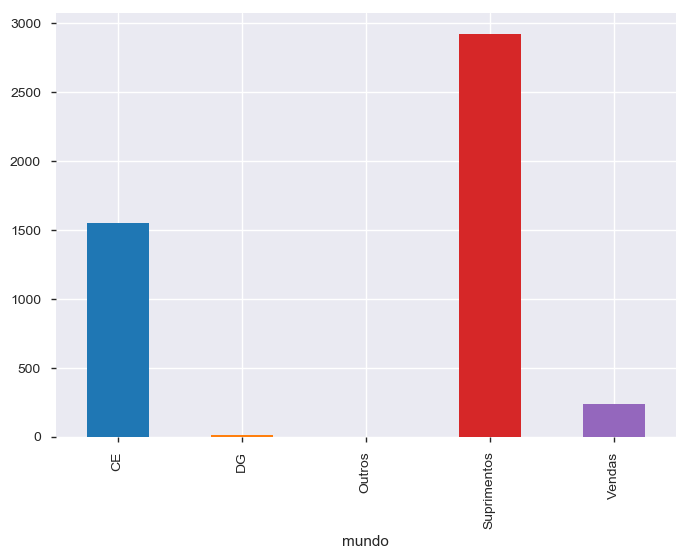

In [124]:
df_clean['meta_projeto'][df_clean['meta_projeto']=="Sim"].groupby(df_clean['mundo']).count().plot(kind='bar')


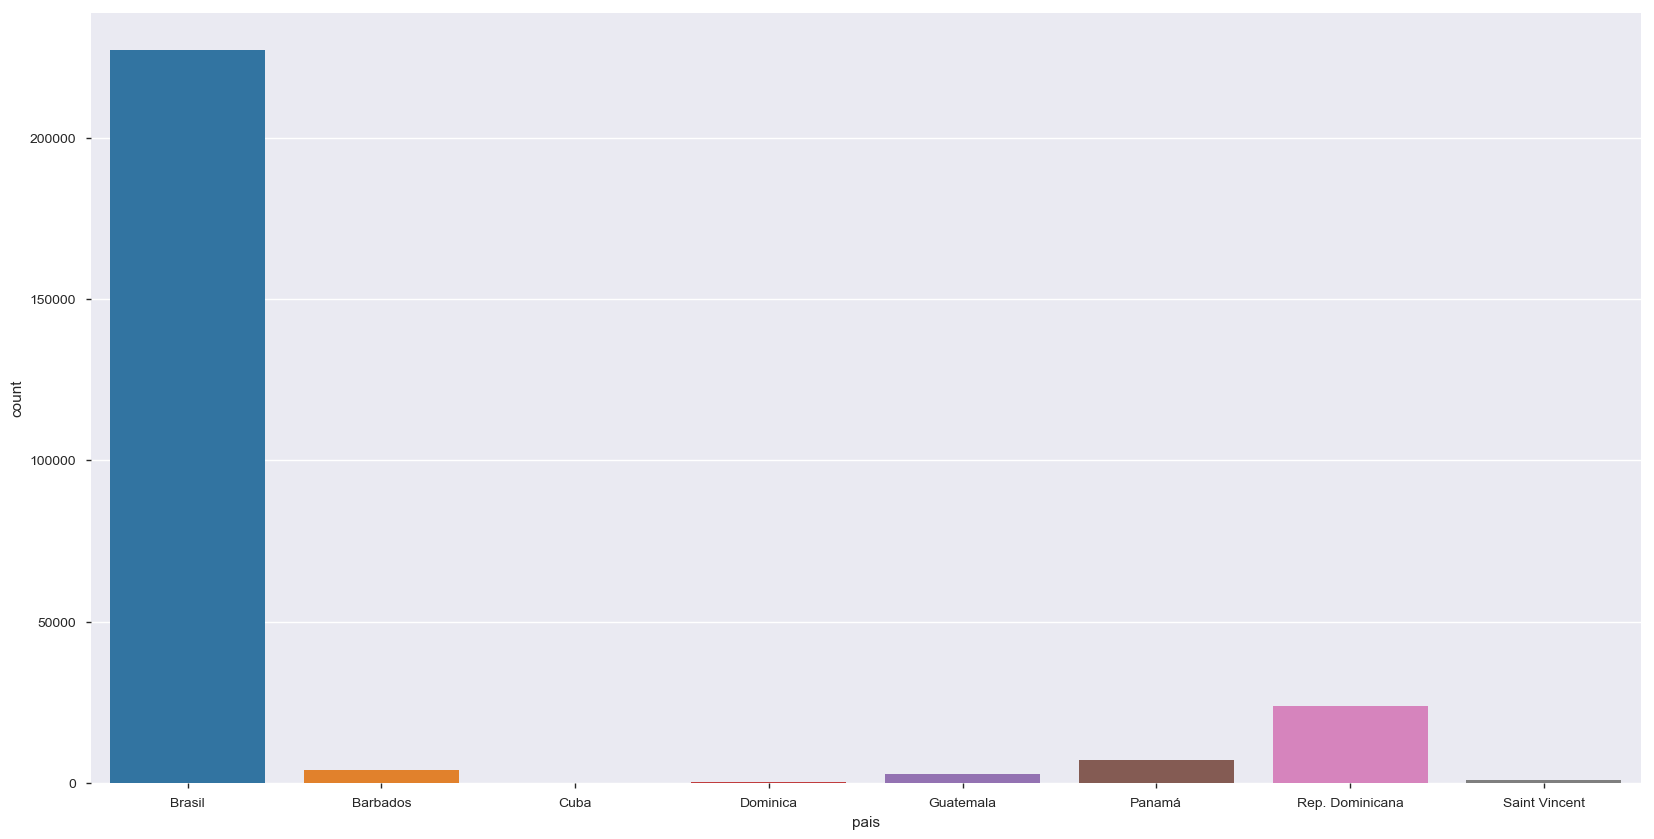

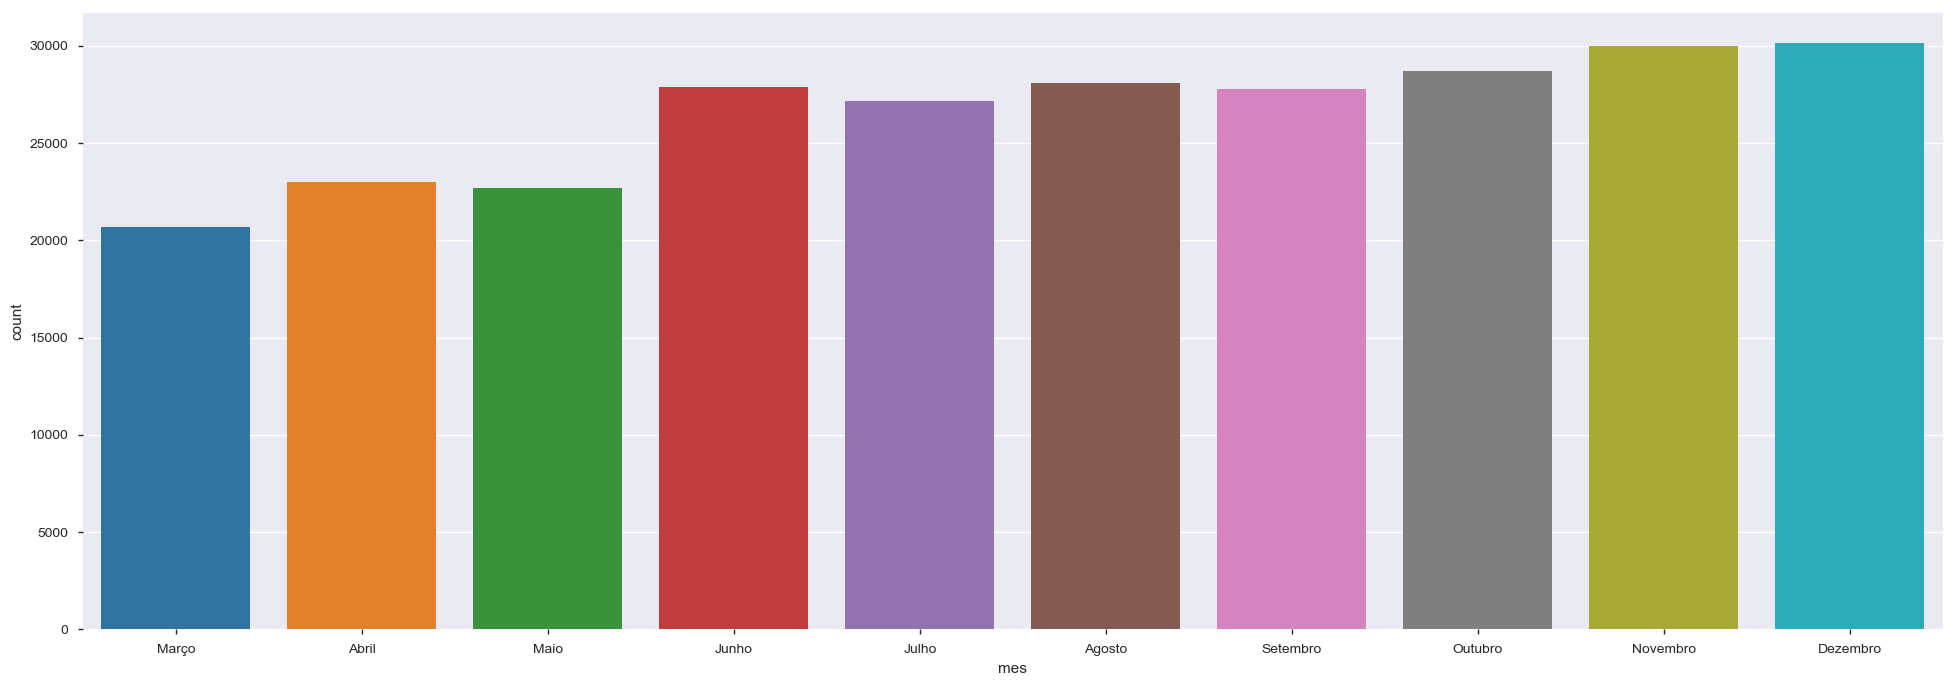

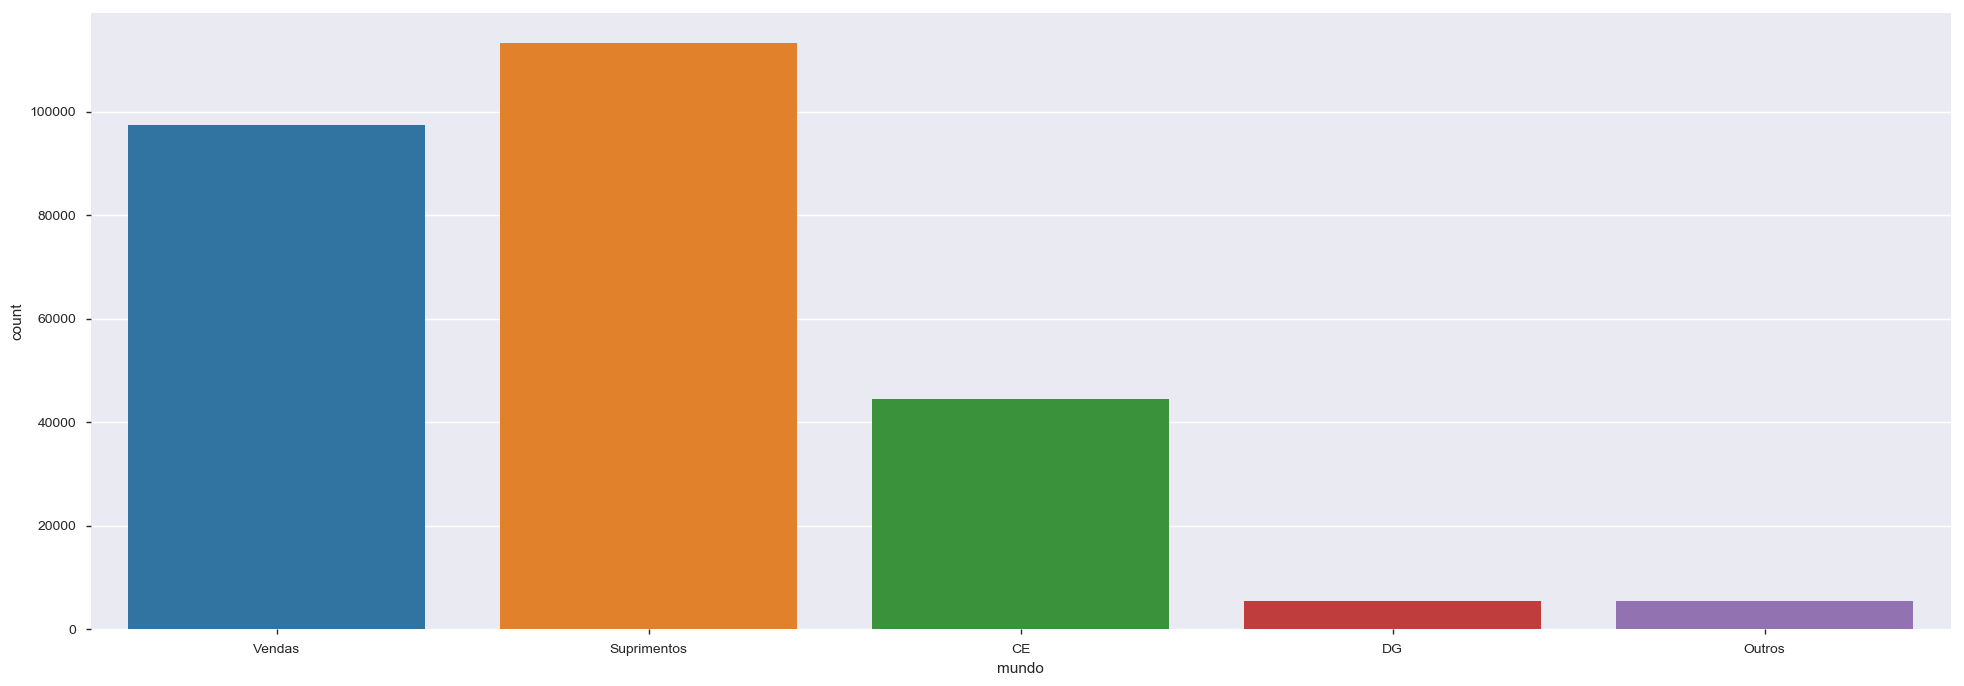

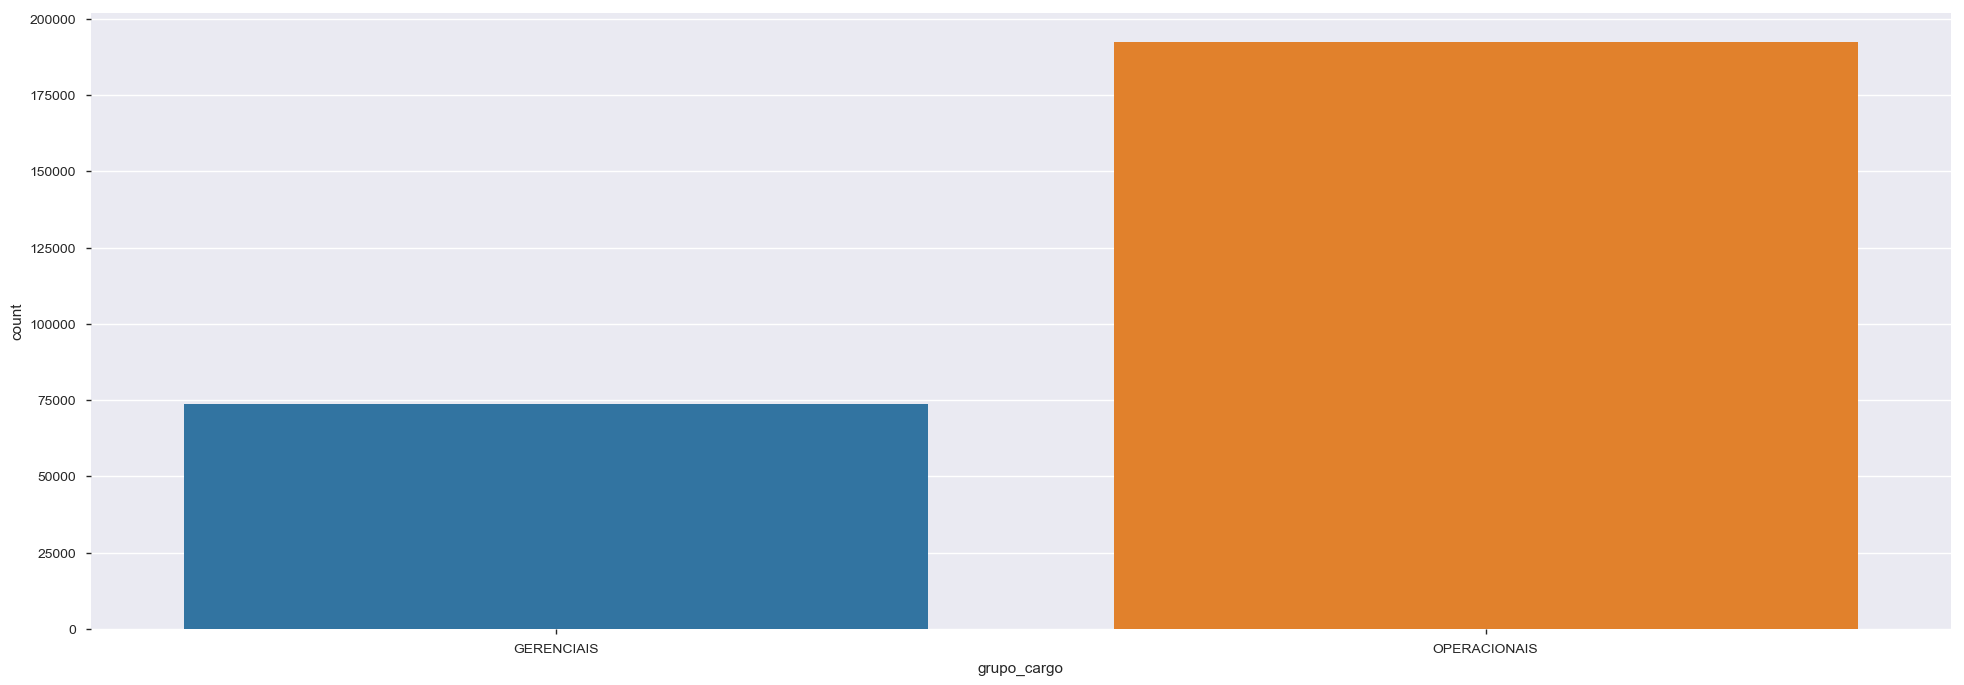

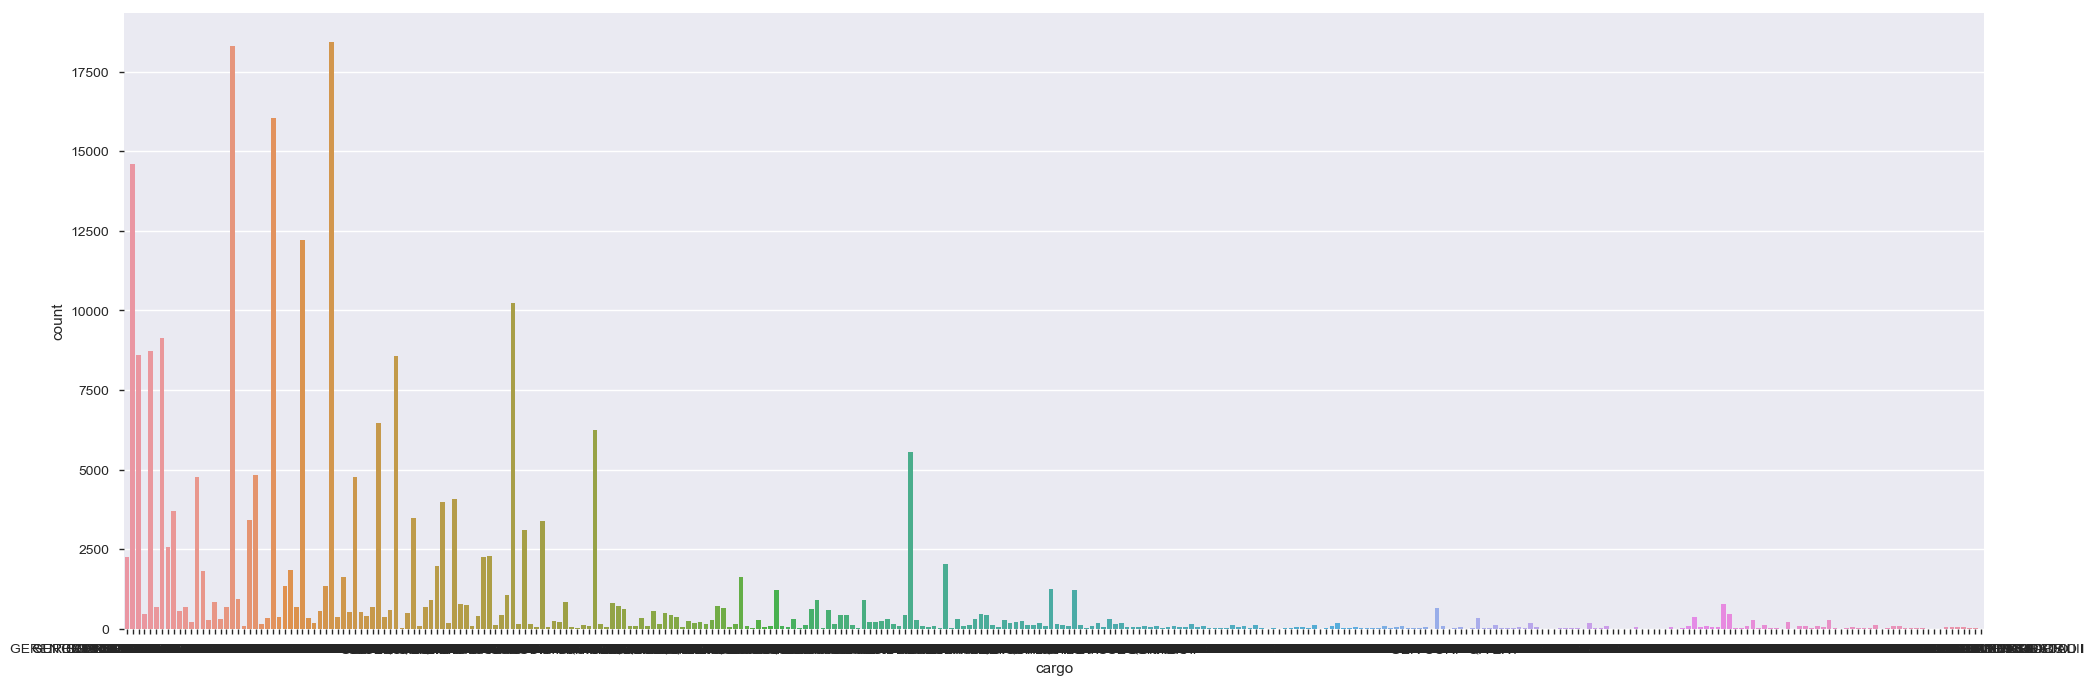

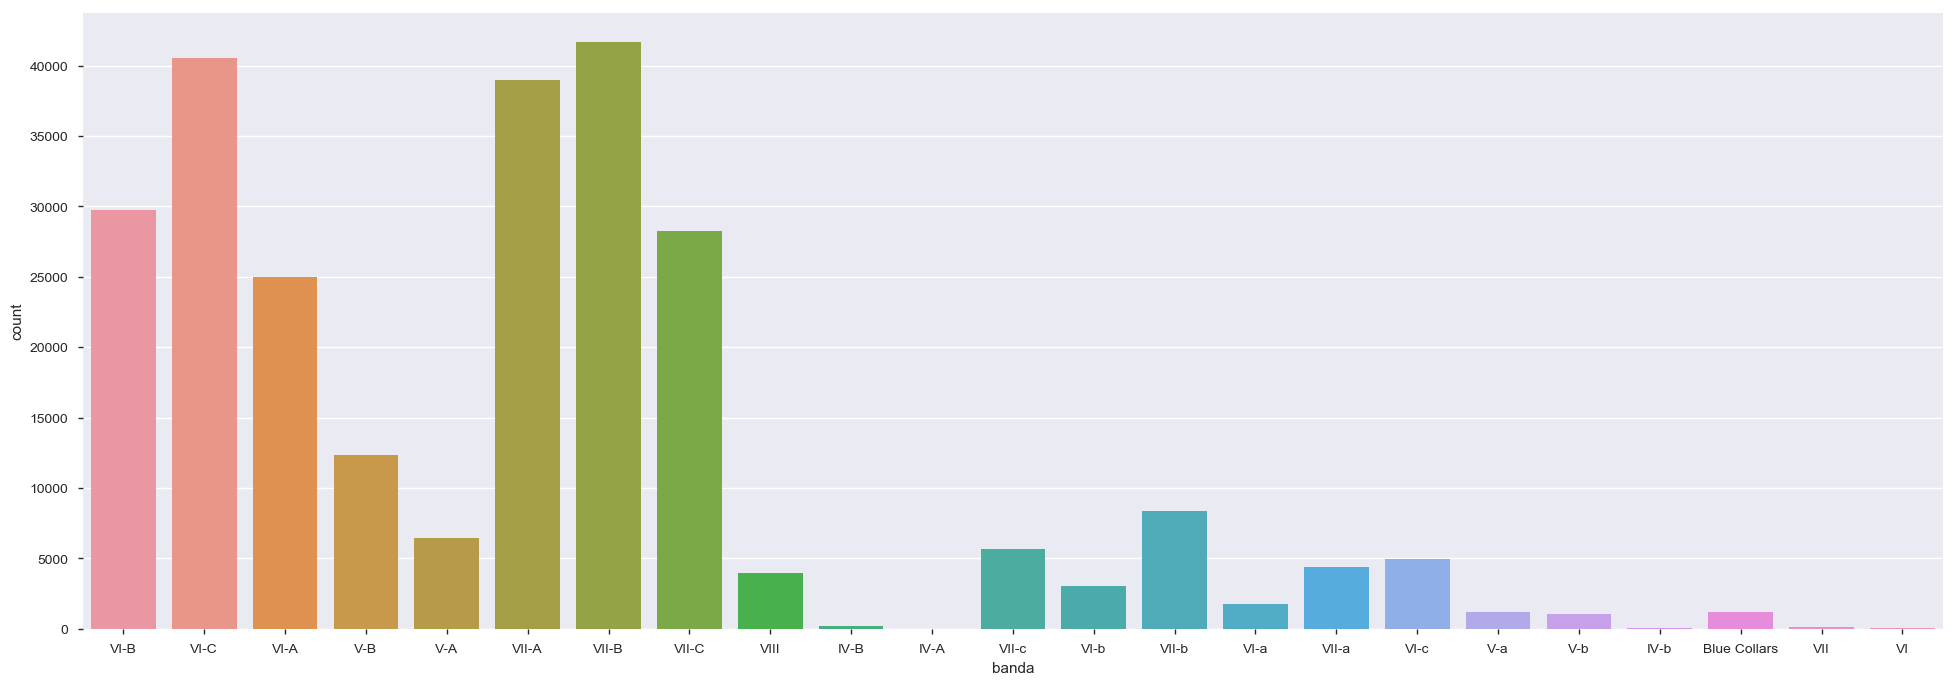

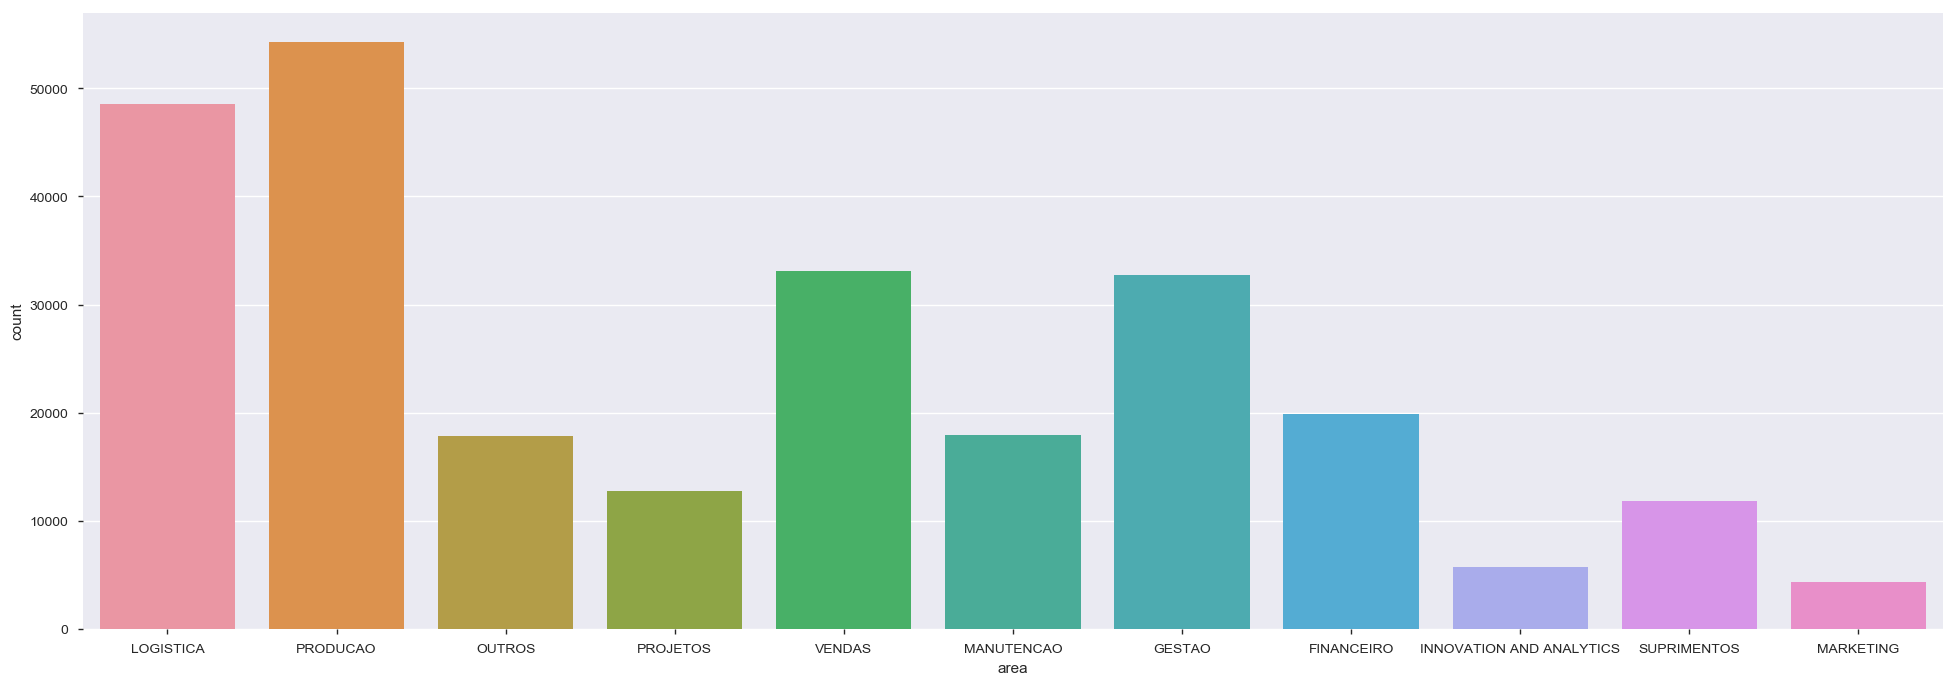

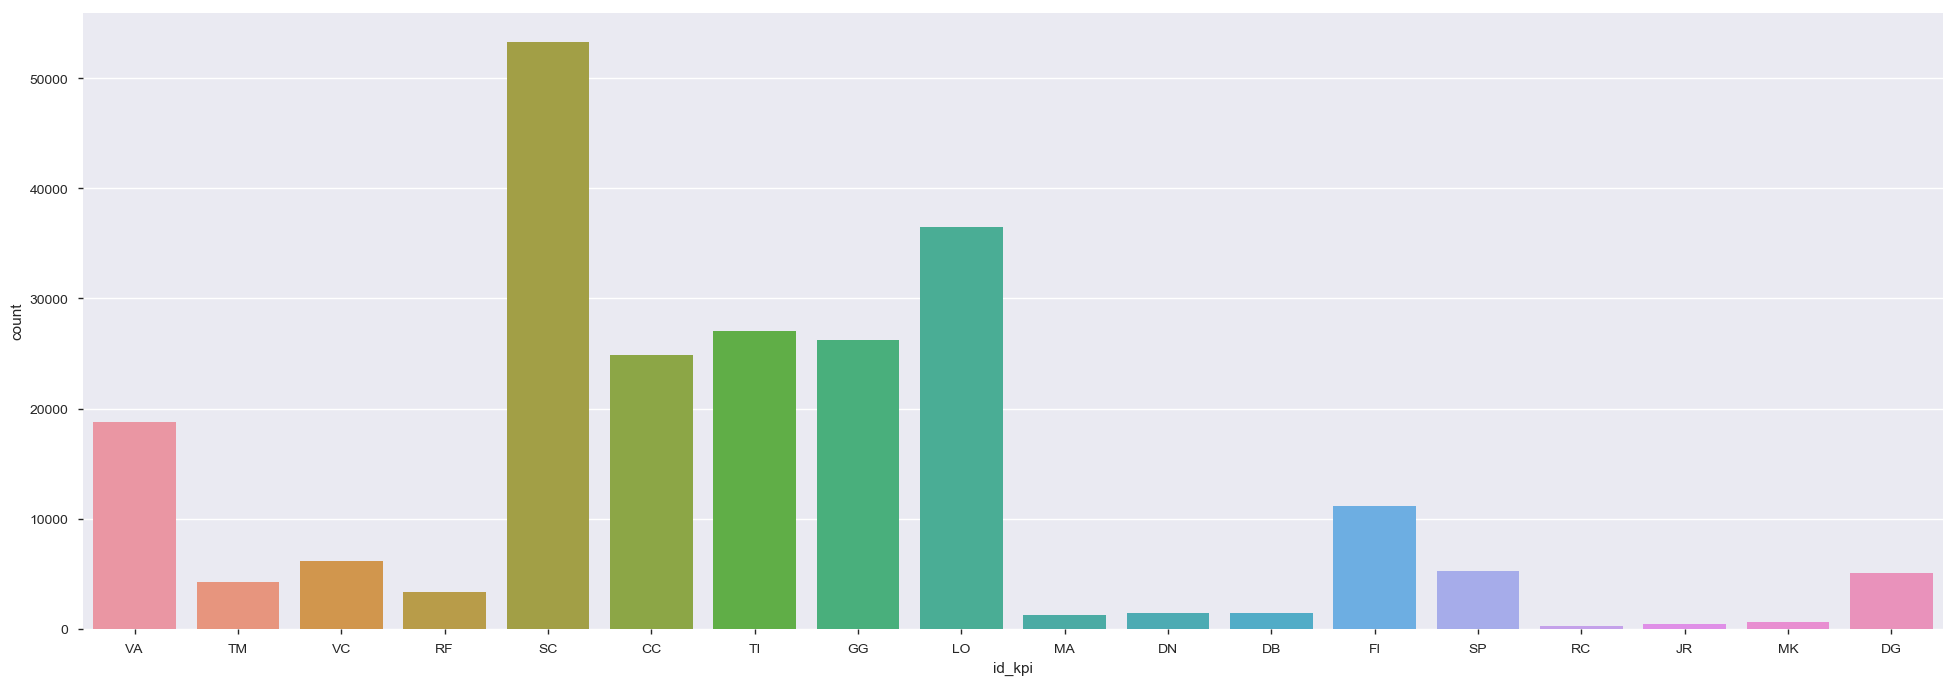

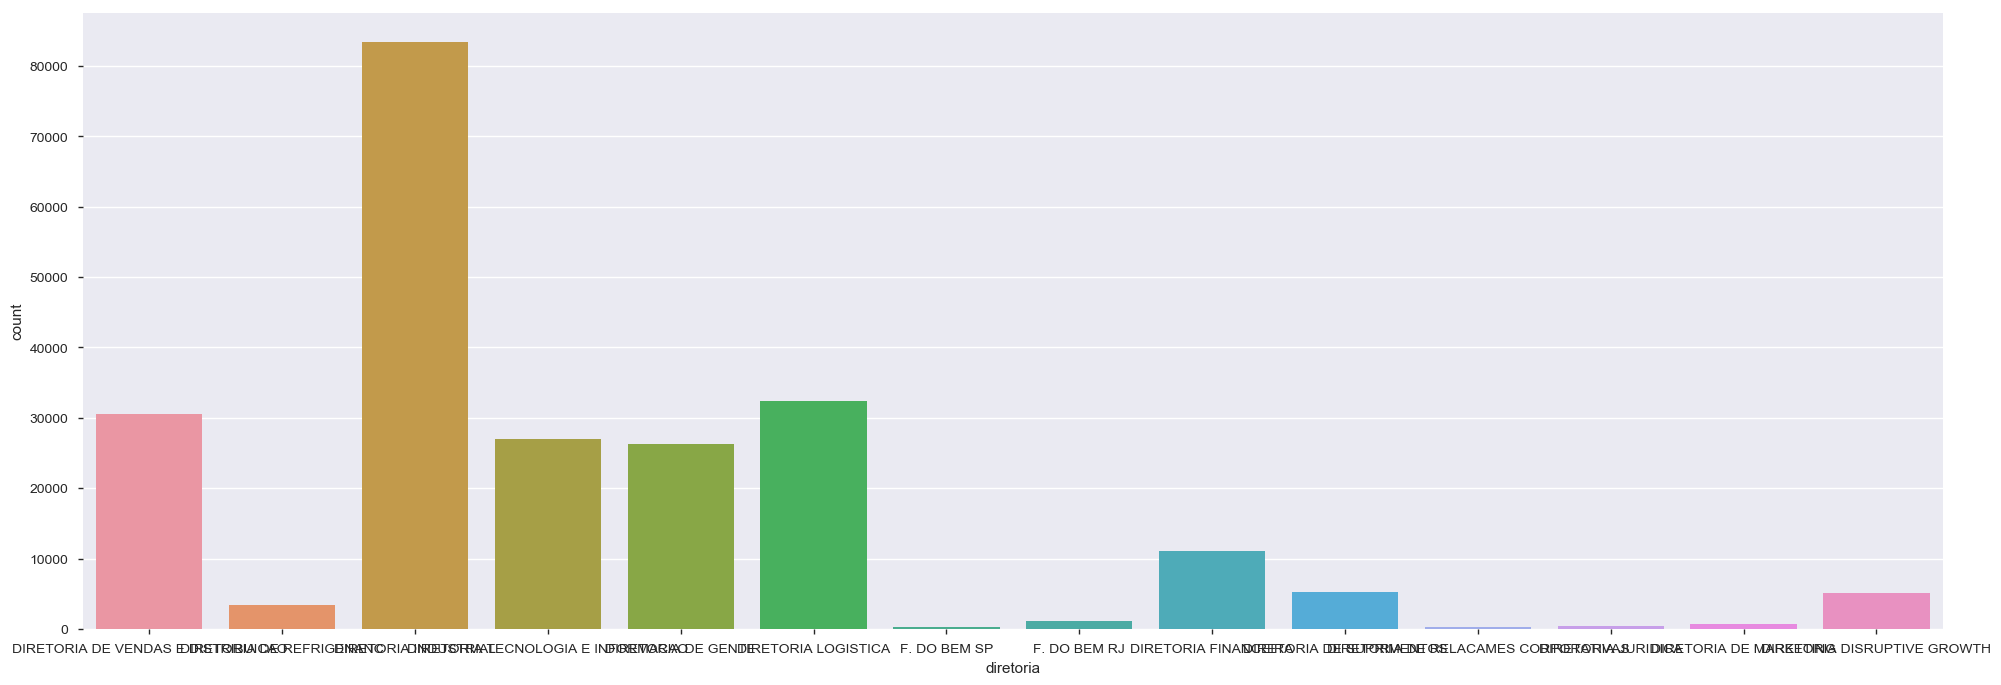

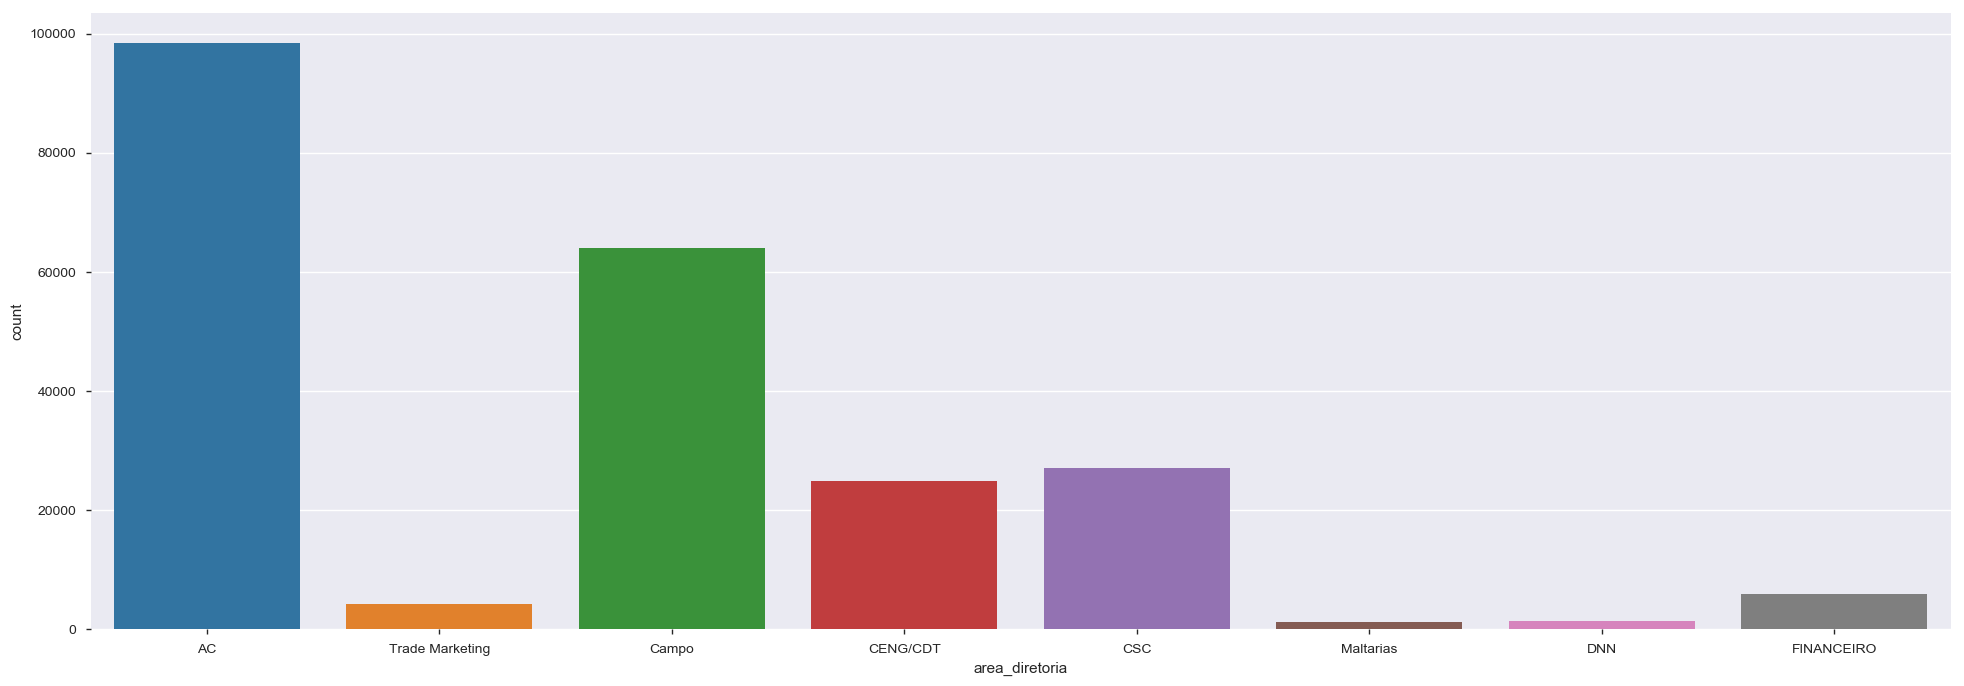

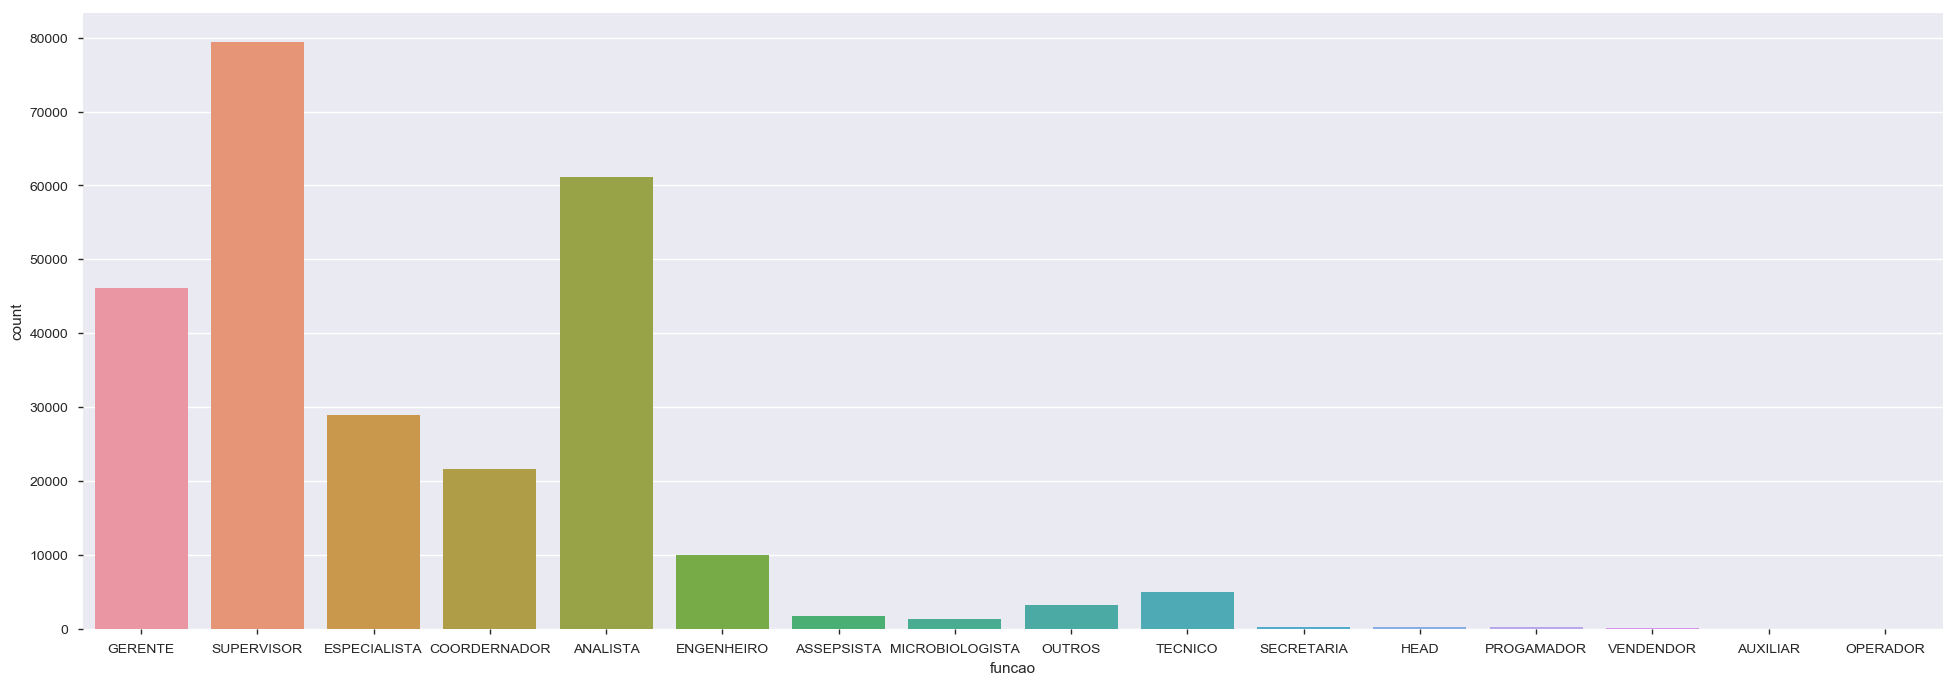

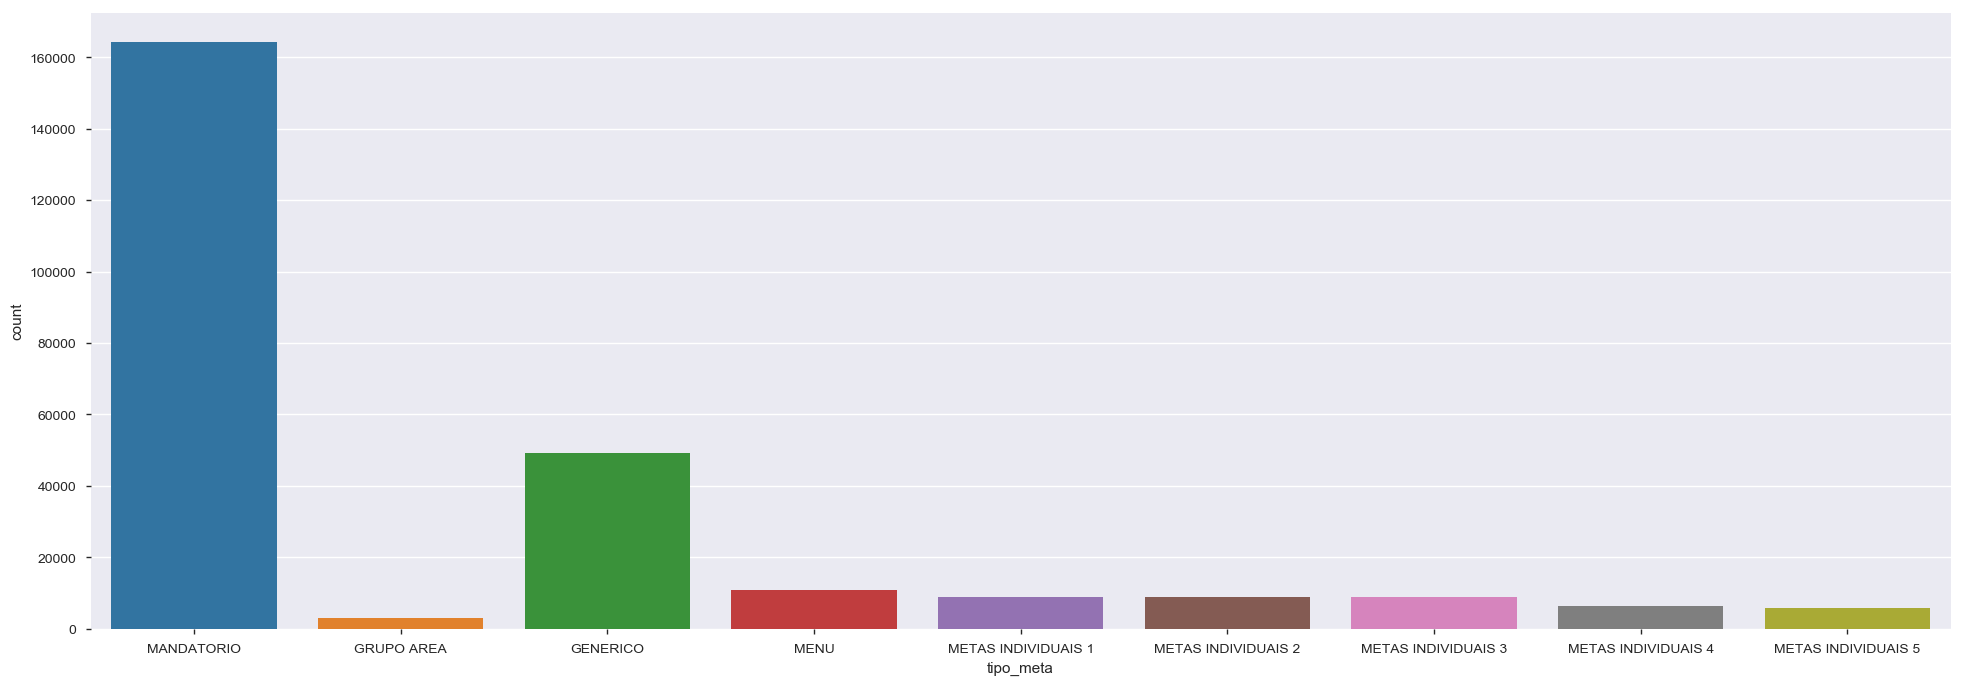

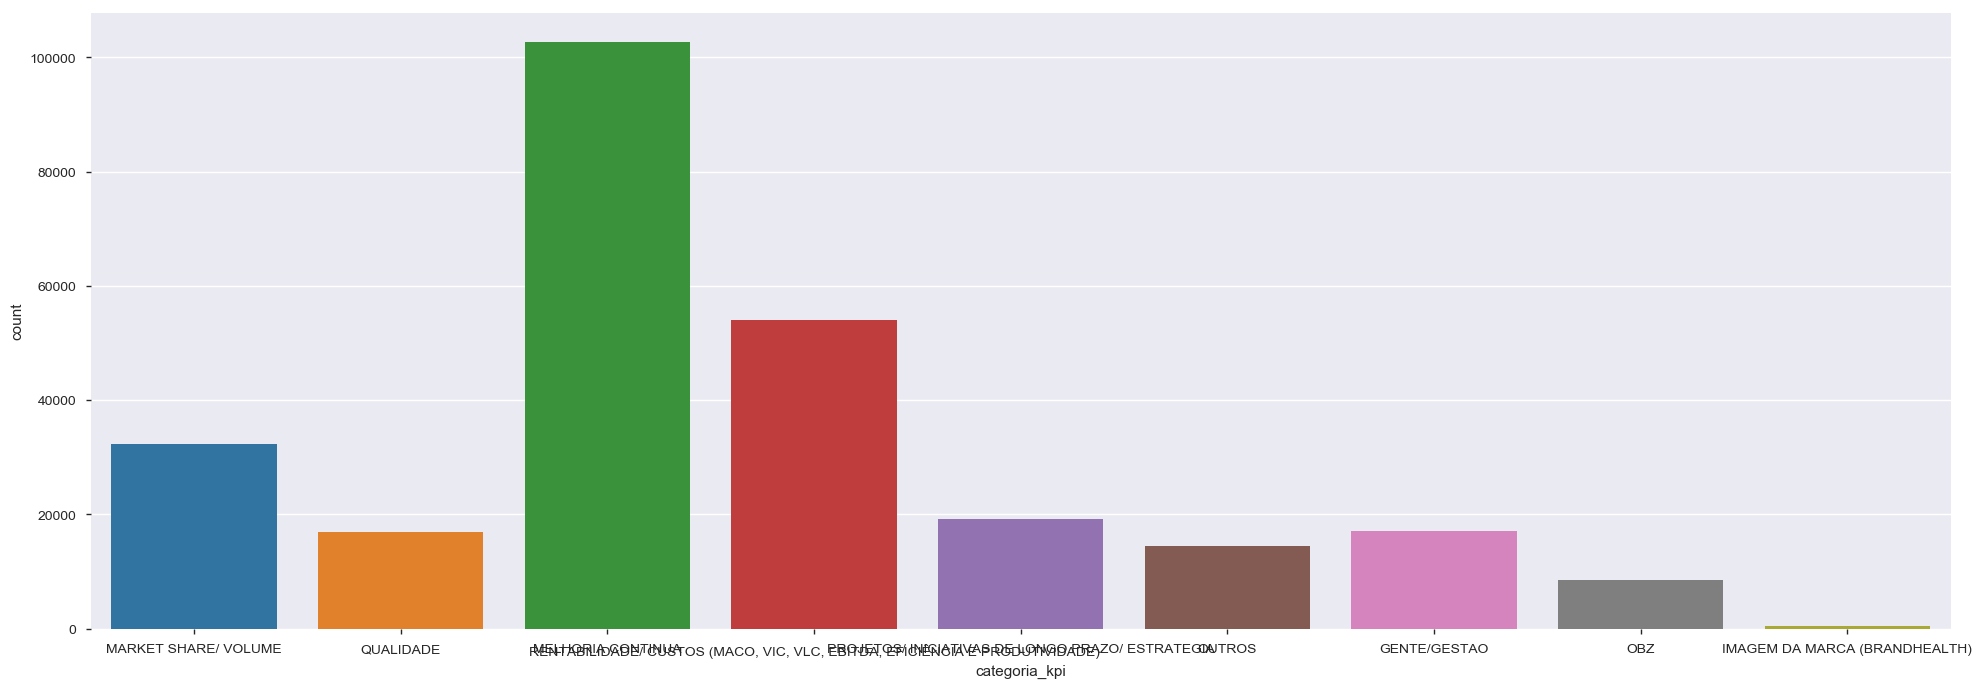

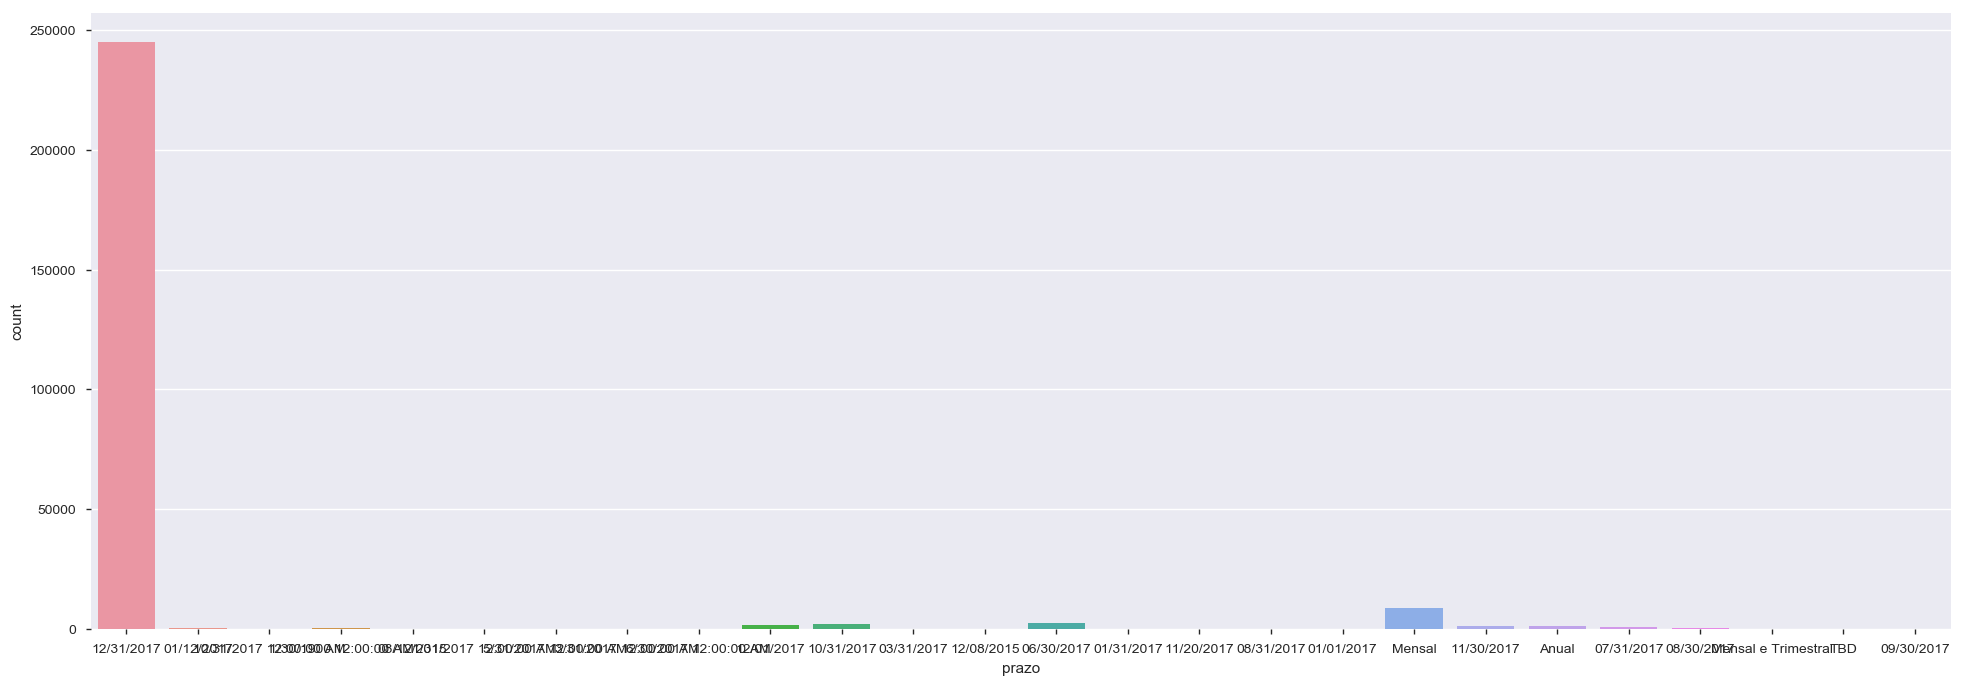

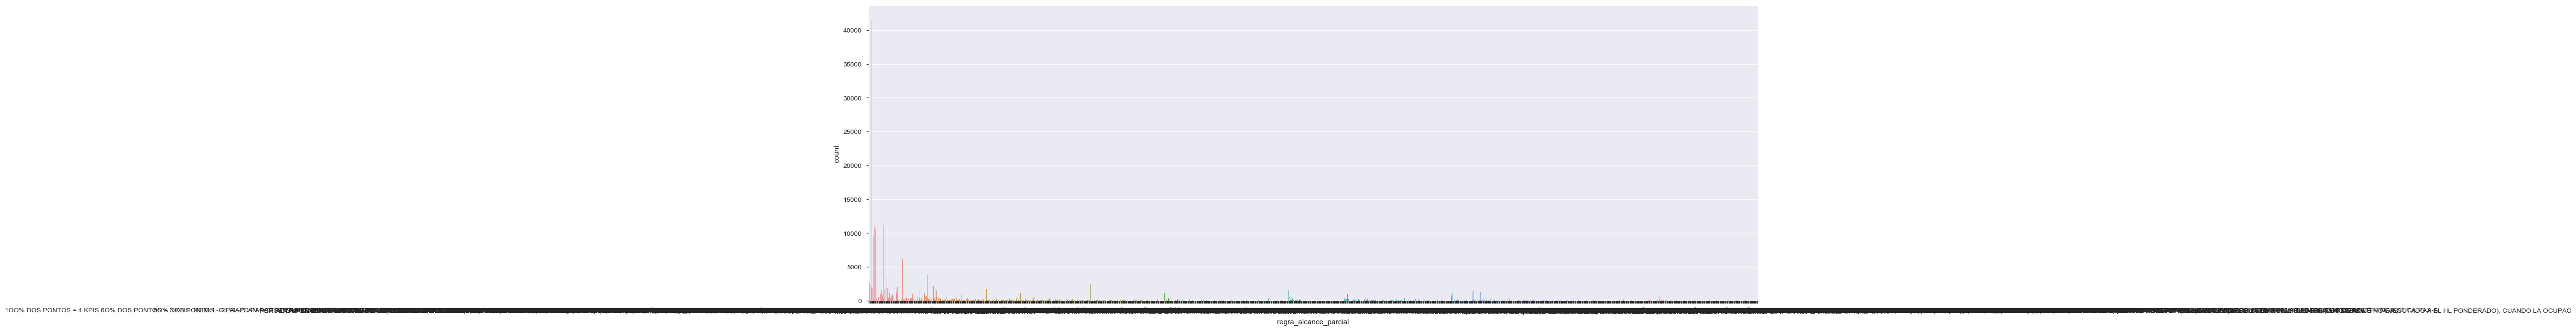

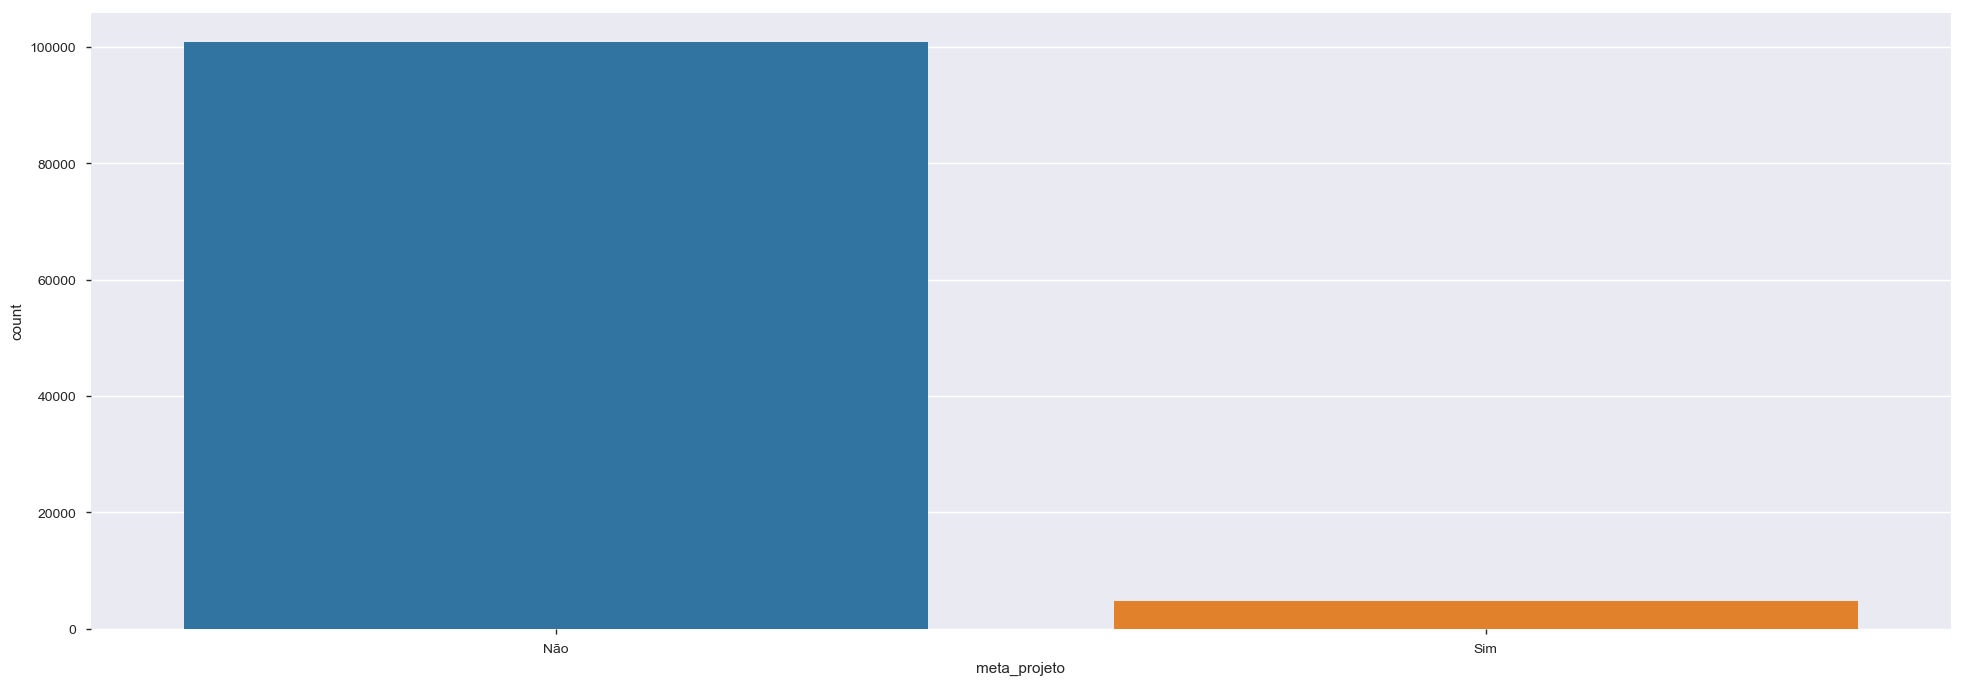

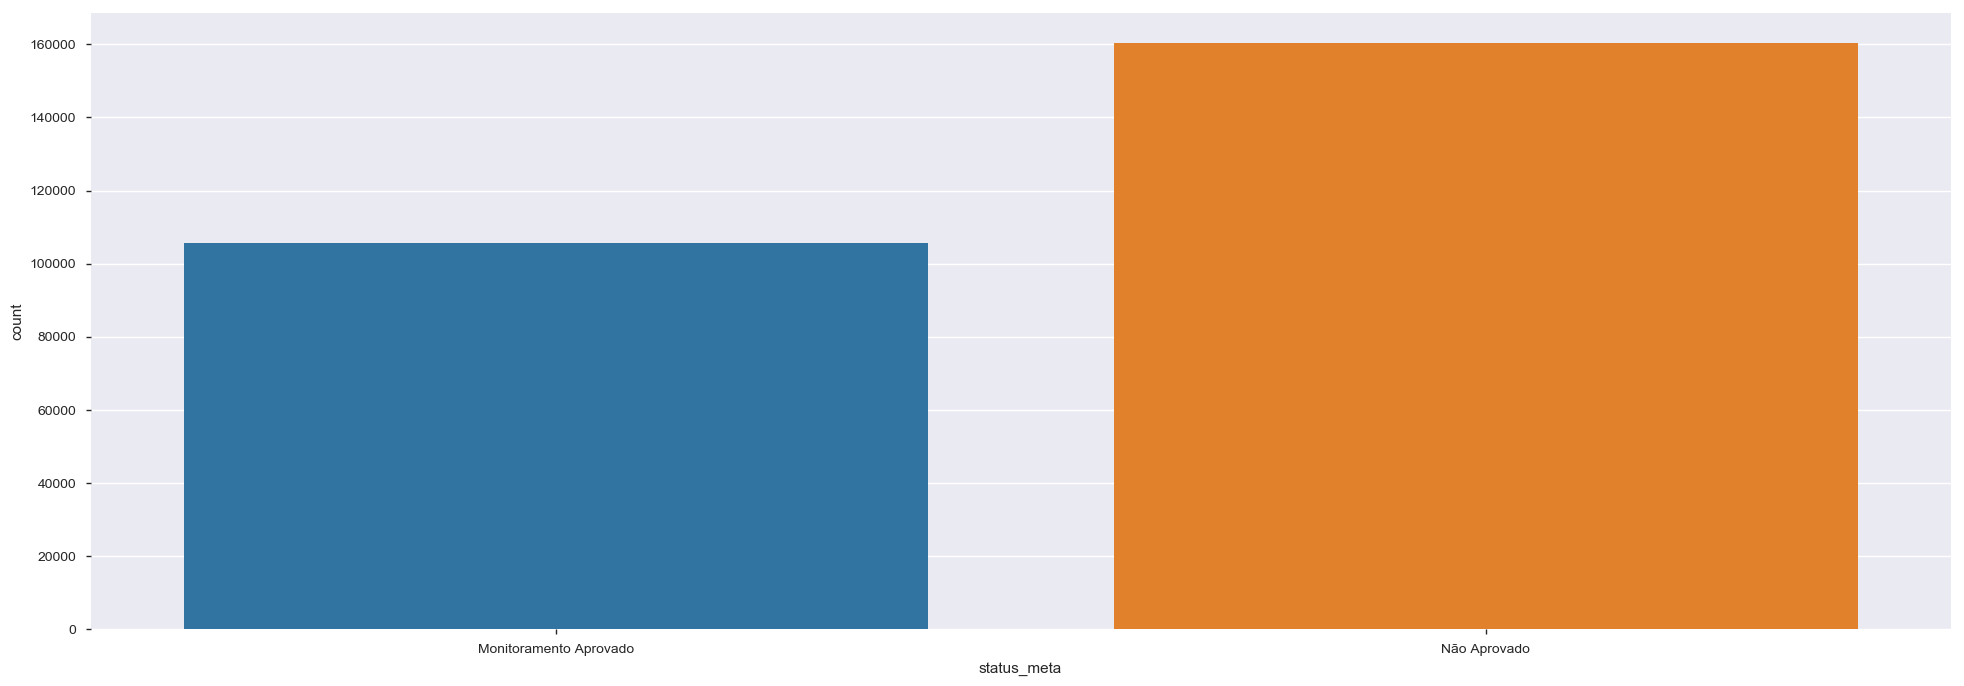

In [130]:
columns = df_clean.select_dtypes(include = 'object').columns.tolist()
plt.figure(figsize = (20,10))
showBarCountPlots(columns,df_clean)